In [2]:
import igraph as ig
import itertools
import networkx as nx
import difflib
import matplotlib.pyplot as plt #to plot data
import math
import numpy as np
#K-clique community detection
from networkx.algorithms.community.kclique import k_clique_communities
#Fast greedy modulartiy algorithm
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
#Label Propagation algorithms
##Not implemented for directed graphs.
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.algorithms.community.label_propagation import asyn_lpa_communities
#The asynchronous fluid communities algorithm
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
#Girvan-Newman
from networkx.algorithms.community.centrality import girvan_newman

In [3]:
#This function takes the membership list and attribute as a parameter
#Adds the membership values to each vertex with given name
def attributer(benchmark, com_list, attr_name):
    z = 1
    for i in com_list:
        a = sorted(i)
        for j in a:
            benchmark.vs[(int(j[1:]))][attr_name] = z
        z = z + 1
    return;

#This function brings the vertex names from corresponding community
def get_comm(benchmark, attr_name, index):
    vs, comms, ccom, j = [],[],[],1
    for i in range(len(benchmark.vs)):
        if benchmark.vs[i][attr_name]:
            if benchmark.vs[i][attr_name] is not None:
                if math.isnan(benchmark.vs[i][attr_name]) == False:
                    vs.append(int(benchmark.vs[i][attr_name]))
    for j in range(1,max(vs)+1):
        for i in range(len(benchmark.vs)):
            if benchmark.vs[i][attr_name] == j: ccom.append(int(benchmark.vs[i]["name"]))
        comms.append(sorted(ccom))
        ccom = []
    return(comms[index])

def get_comms(benchmark, attr_name):
    vs, comms, ccom, j = [],[],[],1
    for i in range(len(benchmark.vs)):
        if benchmark.vs[i][attr_name]:
            if benchmark.vs[i][attr_name] is not None:
                if math.isnan(benchmark.vs[i][attr_name]) == False:
                    vs.append(int(benchmark.vs[i][attr_name]))
    for j in range(1,max(vs)+1):
        for i in range(len(benchmark.vs)):
            if benchmark.vs[i][attr_name] == j: ccom.append(int(benchmark.vs[i]["name"]))
        if ccom != []:
            comms.append(sorted(ccom))
            ccom = []
    return(comms)

#This function returns the average of non-zero values in the matrix
def nonzeroavg(m):
    total, index, lmax = 0, 0, 0
    for i in m:
        for j in i:
            if j != 0:
                if j > float(lmax):
                    lmax = j
                    total = total + j
                    index = index + 1
        lmax = 0
    if index != 0:
        avg = total/index
    else: avg = 0
    return avg;

#This function returns the sequence matching ratio matrix
'''ratio() returns a float in [0, 1], measuring the similarity of the sequences.
As a rule of thumb, a ratio() value over 0.6 means the sequences are close matches:'''
def seq_match(a, b):
    res, r = [], []
    for i in a:
        for j in b:
            s = difflib.SequenceMatcher(None, i, j)
            r.append(float("{0:.3f}".format(s.ratio())))
        res.append(r)
        r = []
    return res

#Clique Percolation method
#This method is taken from a github project
#https://gist.github.com/conradlee/1341933#file-clique_percolation-py
def get_percolated_cliques(G, k):
    perc_graph = nx.Graph()
    cliques = list(frozenset(c) for c in nx.find_cliques(G) if len(c) >= k)
    perc_graph.add_nodes_from(cliques)
    
    # Add an edge in the clique graph for each pair of cliques that percolate
    for c1, c2 in itertools.combinations(cliques, 2):
        if len(c1.intersection(c2)) >= (k - 1):
            perc_graph.add_edge(c1, c2)

    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))
        
#Maximum ratio is the first element in the output
#Printing the first n elements of the list - highest n ratios.
#Print the indexes of the n highest ratio values - from highest to lowest
"""Params:
@ratio: the ratio matrix for first and second clustering to compare
@n    : number of values to print
@f    : first clustering
@s    : second clustering
"""
def getHighestRatios(ratio, n, f, s, lmtr):
    m_index = []
    lastval = []
    for i in sorted(np.partition(np.asarray(ratio).flatten(), -2)[-n:], reverse = True):
        m_ = [(index, row.index(i)) for index, row in enumerate(ratio) if i in row]
        if m_ != lastval:
            m_index = m_index + m_
        lastval = m_
    rList = sorted(np.partition(np.asarray(ratio).flatten(), -2)[-n:], reverse = True)
    printStuff(m_index, rList, f, s, lmtr)
    return;

def getHighestRatioList(ratio, n):
    return sorted(np.partition(np.asarray(ratio).flatten(), -2)[-n:], reverse = True);

def printStuff(m_index, rList, f, s, lmtr):
    for i,j in zip(rList, m_index):
        if i > lmtr:
            print("Sequental matching ratio: %f" % i)
            print("Index: %d - %d" % j)
            print(s[j[1]])
            print(f[j[0]])
            print("----------------------")
    return;

sprtr = "---------------------------------------"

def convertStringList(comms):
    a = []
    for i in range(len(comms)):
        b = []
        for j in range(len(comms[i])):
            c = []
            for z in range(len(comms[i][j])):
                c.append(int(comms[i][j][z]))
            b.append(c)
            c = []
        a.append(b)
        b = []
    return comms;

In [4]:
t75 = nx.read_graphml("Graphml_Networks/test75.graphml")
t100 = nx.read_graphml("Graphml_Networks/test100.graphml")
t400 = nx.read_graphml("Graphml_Networks/test400.graphml")
t1000 = nx.read_graphml("Graphml_Networks/test1000.graphml")
print(nx.info(t75))
print(sprtr)
print(nx.info(t100))
print(sprtr)
print(nx.info(t400))
print(sprtr)
print(nx.info(t1000))

Name: Test 75 A and B
Type: DiGraph
Number of nodes: 75
Number of edges: 266
Average in degree:   3.5467
Average out degree:   3.5467
---------------------------------------
Name: Test 100 A and B
Type: DiGraph
Number of nodes: 100
Number of edges: 482
Average in degree:   4.8200
Average out degree:   4.8200
---------------------------------------
Name: Test400 1 and 2
Type: DiGraph
Number of nodes: 400
Number of edges: 5618
Average in degree:  14.0450
Average out degree:  14.0450
---------------------------------------
Name: Test 1000 A and B
Type: DiGraph
Number of nodes: 1000
Number of edges: 5297
Average in degree:   5.2970
Average out degree:   5.2970


In [5]:
#Community ID's start with 1, not 0.
graphs = [t75, t100, t400, t1000]
gnames = ["test75", "test100", "test400", "test1000"]
for i in range(4):
    cia, cib = nx.get_node_attributes(graphs[i], "Cluster_ID_A"), nx.get_node_attributes(graphs[i], "Cluster_ID_B")
    cia, cib = list(cia.values()), list(cib.values())
    print("Number of communities found in %s com A: %s"% (gnames[i], max(cia)))
    print("Number of communities found in %s com B: %s"% (gnames[i], max(cib)))
    print(sprtr)

Number of communities found in test75 com A: 3.0
Number of communities found in test75 com B: 8.0
---------------------------------------
Number of communities found in test100 com A: 4.0
Number of communities found in test100 com B: 8.0
---------------------------------------
Number of communities found in test400 com A: 15.0
Number of communities found in test400 com B: 48.0
---------------------------------------
Number of communities found in test1000 com A: 39.0
Number of communities found in test1000 com B: 3.0
---------------------------------------


In [6]:
##k = size of the smalles clique
n_kcliq_3 = []
for i in range(len(graphs)):
    k = 3
    n_kcliq_3.append(list(k_clique_communities(nx.DiGraph.to_undirected(graphs[i]), k)))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_kcliq_3[i])))
    for j in n_kcliq_3[i]:
        print(sorted(j))
    print(sprtr)

Number of communities found in test75: 5
['n0', 'n1', 'n11', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n21', 'n22', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n3', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n4', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n56', 'n57', 'n58', 'n59', 'n6', 'n60', 'n61', 'n62', 'n63', 'n64', 'n65', 'n66', 'n67', 'n68', 'n69', 'n70', 'n71', 'n72', 'n73', 'n74', 'n8', 'n9']
['n61', 'n7', 'n71']
['n34', 'n53', 'n54']
['n2', 'n30', 'n39']
['n23', 'n44', 'n48']
---------------------------------------
Number of communities found in test100: 2
['n18', 'n21', 'n33', 'n40', 'n7', 'n87', 'n96']
['n0', 'n1', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n2', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n3', 'n30', 'n31', 'n32', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n4', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n4

In [7]:
##k = size of the smalles clique
n_kcliq_4 = []
for i in range(len(graphs)):
    k = 4
    n_kcliq_4.append(list(k_clique_communities(nx.DiGraph.to_undirected(graphs[i]), k)))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_kcliq_4[i])))
    for j in n_kcliq_4[i]:
        print(sorted(j))
    print(sprtr)

Number of communities found in test75: 7
['n38', 'n52', 'n64', 'n65']
['n25', 'n29', 'n37', 'n47', 'n57', 'n60', 'n68', 'n71', 'n72', 'n73']
['n31', 'n6', 'n70', 'n71']
['n1', 'n33', 'n50', 'n59', 'n63', 'n64', 'n66', 'n67', 'n73', 'n74']
['n46', 'n56', 'n59', 'n74']
['n42', 'n44', 'n49', 'n51', 'n56', 'n61', 'n62', 'n63', 'n64', 'n69', 'n70', 'n74']
['n41', 'n58', 'n66', 'n67']
---------------------------------------
Number of communities found in test100: 5
['n0', 'n14', 'n15', 'n16', 'n19', 'n24', 'n26', 'n27', 'n34', 'n35', 'n38', 'n43', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n57', 'n58', 'n59', 'n60', 'n61', 'n62', 'n63', 'n64', 'n65', 'n66', 'n67', 'n68', 'n70', 'n71', 'n72', 'n73', 'n74', 'n75', 'n76', 'n77', 'n78', 'n79', 'n81', 'n82', 'n83', 'n84', 'n85', 'n86', 'n87', 'n88', 'n89', 'n90', 'n91', 'n92', 'n93', 'n94', 'n95', 'n96', 'n97', 'n98', 'n99']
['n23', 'n44', 'n55', 'n69']
['n20', 'n27', 'n49', 'n51', 'n59', 'n74', 'n80']
['n33', '

In [8]:
n_fastgreedy = []
for i in range(len(graphs)):
    n_fastgreedy.append(list(greedy_modularity_communities(nx.DiGraph.to_undirected(graphs[i]))))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_fastgreedy[i])))
    for j in n_fastgreedy[i]:
        print(sorted(j))
    print(sprtr)

Number of communities found in test75: 1
['n0', 'n1', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n2', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n3', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n4', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n5', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n56', 'n57', 'n58', 'n59', 'n6', 'n60', 'n61', 'n62', 'n63', 'n64', 'n65', 'n66', 'n67', 'n68', 'n69', 'n7', 'n70', 'n71', 'n72', 'n73', 'n74', 'n8', 'n9']
---------------------------------------
Number of communities found in test100: 1
['n0', 'n1', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n2', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n3', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n4', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n5', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n

In [9]:
n_labelprop = []
for i in range(len(graphs)):
    n_labelprop_gen = label_propagation_communities(nx.DiGraph.to_undirected(graphs[i]))
    n_l = []
    for j in n_labelprop_gen:
        n_l.append(list(j))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_l)))
    print(n_l)
    n_labelprop.append(n_l)
    print(sprtr)

Number of communities found in test75: 2
[['n5', 'n59', 'n24', 'n38', 'n40', 'n71', 'n3', 'n0', 'n6', 'n55', 'n61', 'n22', 'n11', 'n34', 'n1', 'n33', 'n52', 'n39', 'n21', 'n13', 'n26', 'n23', 'n42', 'n12', 'n8', 'n62', 'n20', 'n64', 'n67', 'n50', 'n7', 'n54', 'n17', 'n58', 'n9', 'n25', 'n65', 'n29', 'n28', 'n32', 'n66', 'n73', 'n57', 'n68', 'n35', 'n27', 'n31', 'n63', 'n60', 'n72', 'n4', 'n2', 'n37', 'n48', 'n47', 'n16', 'n53', 'n30'], ['n10', 'n18', 'n46', 'n56', 'n19', 'n15', 'n44', 'n49', 'n14', 'n51', 'n74', 'n43', 'n69', 'n70', 'n41', 'n36', 'n45']]
---------------------------------------
Number of communities found in test100: 1
[['n5', 'n59', 'n96', 'n6', 'n41', 'n93', 'n1', 'n10', 'n26', 'n51', 'n84', 'n62', 'n80', 'n25', 'n28', 'n66', 'n73', 'n35', 'n94', 'n78', 'n60', 'n47', 'n30', 'n46', 'n19', 'n85', 'n75', 'n71', 'n61', 'n33', 'n39', 'n23', 'n74', 'n69', 'n77', 'n67', 'n92', 'n82', 'n54', 'n17', 'n58', 'n9', 'n87', 'n68', 'n49', 'n31', 'n98', 'n2', 'n88', 'n53', 'n14', 'n2

In [10]:
##"k" is the number of clusters to be found
n_asynfluid_a = []
avals = [3, 4, 15, 39]
for i in range(len(graphs)):
    n_a = list(asyn_fluidc(nx.DiGraph.to_undirected(graphs[i]), avals[i]))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_a)))
    for j in n_a:
        print(sorted(j))
    n_asynfluid_a.append(n_a)
    print(sprtr)

Number of communities found in test75: 3
['n1', 'n10', 'n14', 'n15', 'n16', 'n18', 'n21', 'n27', 'n32', 'n38', 'n40', 'n42', 'n5', 'n51', 'n52', 'n56', 'n59', 'n61', 'n62', 'n64', 'n66', 'n69', 'n74', 'n8']
['n0', 'n13', 'n17', 'n20', 'n23', 'n33', 'n34', 'n37', 'n41', 'n44', 'n46', 'n50', 'n53', 'n54', 'n58', 'n63', 'n67', 'n7', 'n73', 'n9']
['n11', 'n12', 'n19', 'n2', 'n22', 'n24', 'n25', 'n26', 'n28', 'n29', 'n3', 'n30', 'n31', 'n35', 'n36', 'n39', 'n4', 'n43', 'n45', 'n47', 'n48', 'n49', 'n55', 'n57', 'n6', 'n60', 'n65', 'n68', 'n70', 'n71', 'n72']
---------------------------------------
Number of communities found in test100: 4
['n11', 'n12', 'n18', 'n21', 'n23', 'n30', 'n31', 'n33', 'n40', 'n44', 'n47', 'n5', 'n55', 'n69', 'n7', 'n77', 'n9', 'n96']
['n17', 'n19', 'n2', 'n25', 'n28', 'n34', 'n36', 'n39', 'n42', 'n46', 'n48', 'n54', 'n63', 'n75', 'n8', 'n82', 'n93', 'n97']
['n1', 'n13', 'n14', 'n16', 'n20', 'n22', 'n27', 'n3', 'n32', 'n35', 'n45', 'n49', 'n50', 'n51', 'n52', 'n53',

In [11]:
n_asynfluid_b = []
bvals = [8, 12, 48, 3]
for i in range(len(graphs)):
    n_b = list(asyn_fluidc(nx.DiGraph.to_undirected(graphs[i]), bvals[i]))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_b)))
    for j in n_b:
        print(sorted(j))
    n_asynfluid_b.append(n_b)
    print(sprtr)

Number of communities found in test75: 8
['n19', 'n24', 'n25', 'n29', 'n31', 'n35', 'n37', 'n47', 'n57', 'n6', 'n68', 'n71', 'n73']
['n0', 'n13', 'n26', 'n28', 'n61', 'n72', 'n8']
['n1', 'n21', 'n27', 'n32', 'n38', 'n4', 'n40', 'n52', 'n59', 'n62', 'n64', 'n66', 'n67']
['n3', 'n36', 'n41', 'n43', 'n45', 'n58', 'n60', 'n65']
['n10', 'n11', 'n16', 'n18', 'n5']
['n15', 'n44', 'n46', 'n49', 'n50', 'n51', 'n56', 'n70', 'n74', 'n9']
['n12', 'n14', 'n2', 'n22', 'n30', 'n42', 'n55', 'n63', 'n69', 'n7']
['n17', 'n20', 'n23', 'n33', 'n34', 'n39', 'n48', 'n53', 'n54']
---------------------------------------
Number of communities found in test100: 12
['n1', 'n13', 'n20', 'n27', 'n36', 'n49', 'n51', 'n59', 'n74', 'n80']
['n4', 'n41', 'n57', 'n62', 'n71', 'n79', 'n85', 'n90', 'n91', 'n92']
['n35', 'n50', 'n52', 'n53', 'n67', 'n68', 'n70', 'n94', 'n95']
['n19', 'n28', 'n39', 'n42', 'n48', 'n63', 'n75', 'n8', 'n97']
['n14', 'n16', 'n22', 'n64', 'n65', 'n72', 'n78', 'n81', 'n86', 'n87', 'n88', 'n98']
[

In [12]:
n_asynfluid_ab = []
abvals = [11, 16, 63, 42]
for i in range(len(graphs)):
    n_ab = list(asyn_fluidc(nx.DiGraph.to_undirected(graphs[i]), abvals[i]))
    print("Number of communities found in %s: %s"% (gnames[i], len(n_ab)))
    for j in n_ab:
        print(sorted(j))
    n_asynfluid_ab.append(n_ab)
    print(sprtr)

Number of communities found in test75: 11
['n3', 'n36', 'n42', 'n43', 'n45', 'n69']
['n12', 'n2', 'n30', 'n35', 'n39']
['n0', 'n22', 'n24', 'n25', 'n29', 'n37', 'n47', 'n57', 'n60', 'n68', 'n72', 'n73']
['n17', 'n20', 'n33', 'n34', 'n53', 'n54', 'n9']
['n11', 'n21', 'n31', 'n41', 'n49', 'n58', 'n6', 'n70', 'n71']
['n27', 'n32', 'n40', 'n59', 'n63', 'n66', 'n67']
['n1', 'n38', 'n4', 'n52', 'n55', 'n64', 'n65']
['n26', 'n5', 'n56', 'n61', 'n7']
['n19', 'n23', 'n28', 'n44', 'n48']
['n10', 'n15', 'n18', 'n51']
['n13', 'n14', 'n16', 'n46', 'n50', 'n62', 'n74', 'n8']
---------------------------------------
Number of communities found in test100: 16
['n15', 'n22', 'n56', 'n62', 'n76', 'n92']
['n10', 'n34', 'n36', 'n46', 'n54', 'n63', 'n93', 'n97']
['n17', 'n19', 'n48', 'n75']
['n23', 'n44', 'n5', 'n55', 'n69', 'n9']
['n0', 'n16', 'n24', 'n26', 'n38', 'n43', 'n99']
['n2', 'n25', 'n42', 'n82']
['n57', 'n73', 'n84', 'n89', 'n90']
['n12', 'n28', 'n31', 'n86', 'n96']
['n39', 'n53', 'n8', 'n94']
['

In [13]:
a_perccliq_3 = []
for i in range(len(graphs)):
    a_perccliq_gen = get_percolated_cliques(nx.DiGraph.to_undirected(graphs[i]), 3)
    a_p = []
    for j in a_perccliq_gen:
        a_p.append(list(j))
    print("Number of communities found in %s: %s"% (gnames[i], len(sorted(a_p))))
    print(a_p)
    a_perccliq_3.append(a_p)
    print(sprtr)

Number of communities found in test75: 5
[['n18', 'n46', 'n44', 'n19', 'n14', 'n59', 'n38', 'n24', 'n40', 'n71', 'n0', 'n6', 'n41', 'n55', 'n61', 'n22', 'n3', 'n11', 'n34', 'n1', 'n33', 'n52', 'n39', 'n21', 'n26', 'n13', 'n42', 'n74', 'n51', 'n8', 'n62', 'n70', 'n69', 'n43', 'n64', 'n67', 'n50', 'n15', 'n54', 'n17', 'n58', 'n9', 'n25', 'n65', 'n29', 'n28', 'n66', 'n32', 'n73', 'n57', 'n56', 'n68', 'n49', 'n35', 'n27', 'n31', 'n63', 'n47', 'n72', 'n60', 'n4', 'n37', 'n48', 'n36', 'n45', 'n16', 'n53'], ['n61', 'n71', 'n7'], ['n53', 'n34', 'n54'], ['n2', 'n39', 'n30'], ['n48', 'n23', 'n44']]
---------------------------------------
Number of communities found in test100: 2
[['n18', 'n33', 'n21', 'n7', 'n40', 'n96', 'n87'], ['n5', 'n14', 'n59', 'n24', 'n91', 'n96', 'n3', 'n6', 'n0', 'n41', 'n55', 'n93', 'n48', 'n11', 'n34', 'n10', 'n1', 'n13', 'n26', 'n84', 'n51', 'n12', 'n8', 'n62', 'n20', 'n80', 'n50', 'n15', 'n89', 'n99', 'n25', 'n95', 'n28', 'n66', 'n32', 'n73', 'n57', 'n35', 'n94', 'n6

In [14]:
a_perccliq_4 = []
for i in range(len(graphs)):
    a_perccliq_gen = get_percolated_cliques(nx.DiGraph.to_undirected(graphs[i]), 4)
    a_p = []
    for j in a_perccliq_gen:
        a_p.append(list(j))
    print("Number of communities found in %s: %s"% (gnames[i], len(a_p)))
    print(a_p)
    a_perccliq_4.append(a_p)
    print(sprtr)

Number of communities found in test75: 7
[['n65', 'n64', 'n38', 'n52'], ['n73', 'n57', 'n68', 'n25', 'n72', 'n60', 'n29', 'n71', 'n37', 'n47'], ['n31', 'n70', 'n71', 'n6'], ['n73', 'n67', 'n33', 'n1', 'n50', 'n63', 'n59', 'n74', 'n66', 'n64'], ['n46', 'n59', 'n74', 'n56'], ['n56', 'n44', 'n49', 'n42', 'n63', 'n74', 'n51', 'n62', 'n69', 'n70', 'n61', 'n64'], ['n67', 'n58', 'n66', 'n41']]
---------------------------------------
Number of communities found in test100: 5
[['n46', 'n76', 'n19', 'n79', 'n14', 'n59', 'n38', 'n85', 'n91', 'n24', 'n75', 'n96', 'n0', 'n71', 'n55', 'n61', 'n93', 'n48', 'n34', 'n52', 'n26', 'n84', 'n53', 'n74', 'n51', 'n62', 'n70', 'n83', 'n43', 'n77', 'n97', 'n64', 'n67', 'n92', 'n15', 'n82', 'n54', 'n50', 'n58', 'n99', 'n65', 'n95', 'n66', 'n87', 'n73', 'n57', 'n68', 'n49', 'n94', 'n35', 'n27', 'n63', 'n47', 'n86', 'n78', 'n72', 'n98', 'n60', 'n90', 'n81', 'n45', 'n88', 'n16', 'n89'], ['n55', 'n69', 'n23', 'n44'], ['n80', 'n49', 'n27', 'n59', 'n74', 'n51', 'n20'

In [15]:
n_ = []
for i in range(len(graphs)):
    k = 2
    comp = girvan_newman(graphs[i])
    comms = []
    for communities in itertools.islice(comp, k):
        comms.append(list(communities))
    n_.append(comms)
    print("Number of communities found in %s: %s"% (gnames[i], len(comms)))
    print(comms)
    print(sprtr)

Number of communities found in test75: 2
[[{'n5', 'n18', 'n46', 'n19', 'n44', 'n14', 'n59', 'n38', 'n24', 'n40', 'n71', 'n0', 'n3', 'n41', 'n55', 'n61', 'n22', 'n6', 'n11', 'n34', 'n10', 'n1', 'n33', 'n52', 'n21', 'n42', 'n13', 'n26', 'n23', 'n74', 'n51', 'n12', 'n8', 'n62', 'n69', 'n70', 'n43', 'n20', 'n64', 'n67', 'n50', 'n15', 'n54', 'n7', 'n17', 'n58', 'n9', 'n25', 'n65', 'n29', 'n45', 'n28', 'n66', 'n32', 'n73', 'n57', 'n56', 'n68', 'n49', 'n35', 'n27', 'n31', 'n63', 'n72', 'n60', 'n4', 'n37', 'n48', 'n36', 'n47', 'n16', 'n53'}, {'n2', 'n39', 'n30'}], [{'n5', 'n18', 'n46', 'n19', 'n44', 'n14', 'n59', 'n38', 'n24', 'n40', 'n71', 'n0', 'n3', 'n41', 'n55', 'n61', 'n6', 'n22', 'n11', 'n10', 'n1', 'n33', 'n52', 'n21', 'n42', 'n26', 'n13', 'n74', 'n51', 'n12', 'n8', 'n62', 'n69', 'n70', 'n43', 'n64', 'n67', 'n50', 'n15', 'n7', 'n58', 'n9', 'n25', 'n65', 'n29', 'n28', 'n66', 'n32', 'n73', 'n57', 'n56', 'n68', 'n49', 'n35', 'n27', 'n31', 'n63', 'n47', 'n60', 'n72', 'n4', 'n37', 'n48', 'n3

KeyboardInterrupt: 

In [16]:
g75 = ig.read("Graphml_Networks/test75.graphml", format="graphml")
g100 = ig.read("Graphml_Networks/test100.graphml", format="graphml")
g400 = ig.read("Graphml_Networks/test400.graphml", format="graphml")
g1000 = ig.read("Graphml_Networks/test1000.graphml", format="graphml")
gs = [g75, g100, g400, g1000]

/home/slm/.local/lib/python3.7/site-packages/igraph/__init__.py:2223: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  return reader(f, *args, **kwds)


In [17]:
"""Converting id attribute from "n0" to "0"
This is due to gml formatting
"""
#for i in range(len(gs)):
#    for j in range(len(gs[i].vs)):
        #del gs[i].vs[j]["name"]
        #gs[i].vs[j]["id"] = gs[i].vs[j]["id"][1:]
        #del gs[i].vs[j]["name"]

'Converting id attribute from "n0" to "0"\nThis is due to gml formatting\n'

In [18]:
for i in range(len(gs)):
    attributer(gs[i], n_kcliq_3[i], "nkcliq3")
    attributer(gs[i], n_kcliq_4[i], "nkcliq4")
    attributer(gs[i], n_fastgreedy[i], "nfastgreedy")
    attributer(gs[i], n_labelprop[i], "nlabelprop")
    attributer(gs[i], n_asynfluid_a[i], "nasynfluida")
    attributer(gs[i], n_asynfluid_b[i], "nasynfluidb")
    attributer(gs[i], n_asynfluid_ab[i], "nasynfluidab")
    attributer(gs[i], a_perccliq_3[i], "aperccliq3")
    attributer(gs[i], a_perccliq_4[i], "aperccliq4")

In [19]:
print(g75.vs[7])

igraph.Vertex(<igraph.Graph object at 0x7f42e2dd8408>, 7, {'name': '8', 'Cluster_ID_A': 1.0, 'Cluster_ID_B': 6.0, 'comm_greedy': 2.0, 'comm_infomap': 1.0, 'comm_labelprop': 1.0, 'comm_louvain': 6.0, 'comm_spinglass': 6.0, 'comm_walktrap': 2.0, 'id': 'n7', 'nkcliq3': 2, 'nkcliq4': nan, 'nfastgreedy': 1, 'nlabelprop': 1, 'nasynfluida': 2, 'nasynfluidb': 7, 'nasynfluidab': 8, 'aperccliq3': 2, 'aperccliq4': nan})


In [20]:
g75.write_graphml("Graphml_Networks/test75.graphml")
g75.write_gml("Graphml_Networks/test75.gml")
g100.write_graphml("Graphml_Networks/test100.graphml")
g100.write_gml("Graphml_Networks/test100.gml")
g400.write_graphml("Graphml_Networks/test400.graphml")
g400.write_gml("Graphml_Networks/test400.gml")
g1000.write_graphml("Graphml_Networks/test1000.graphml")
g1000.write_gml("Graphml_Networks/test1000.gml")

In [21]:
for i in range(4):
    print("%s graph community memberships" % gnames[i])
    vs_A = []
    for j in range(len(gs[i].vs)):
        vs_A.append(int(gs[i].vs[j]['Cluster_ID_A']))
    print(vs_A)
    vs_B = []
    for j in range(len(gs[i].vs)):
        vs_B.append(int(gs[i].vs[j]['Cluster_ID_B']))
    print(vs_B)
    print(sprtr)

test75 graph community memberships
[2, 3, 1, 1, 1, 1, 3, 1, 3, 2, 2, 1, 1, 3, 2, 2, 1, 3, 2, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 2, 1, 2, 3, 2, 1, 3, 3, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2]
[8, 3, 6, 7, 3, 2, 7, 6, 1, 1, 4, 7, 6, 1, 6, 6, 6, 2, 3, 6, 8, 7, 1, 5, 7, 1, 4, 5, 1, 1, 5, 7, 7, 2, 8, 5, 4, 1, 3, 5, 2, 2, 6, 4, 5, 4, 6, 1, 5, 7, 6, 6, 3, 8, 8, 3, 6, 1, 2, 6, 1, 6, 6, 6, 3, 3, 2, 2, 1, 6, 7, 7, 1, 1, 6]
---------------------------------------
test100 graph community memberships
[2, 2, 1, 1, 1, 2, 3, 1, 4, 1, 3, 1, 1, 3, 2, 3, 2, 1, 3, 4, 4, 4, 3, 1, 2, 1, 2, 2, 1, 3, 3, 1, 1, 1, 4, 4, 3, 1, 2, 4, 1, 3, 2, 2, 3, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 4, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 2, 3, 4, 1, 4, 2, 1, 4, 1, 1, 3, 2, 3, 2, 3, 4, 1, 2, 4, 2, 1, 1, 1, 3, 3, 2, 3, 4, 4, 4, 1, 4, 2, 2]
[3, 7, 5, 2, 5, 6, 5, 1, 8, 6, 5, 5, 6, 7, 2, 5, 2, 2, 1, 5, 7, 1, 2, 6, 3, 8, 3, 7, 8, 5, 5, 4, 2, 1, 5, 4, 5, 5, 3, 8, 1, 5, 8, 3, 6, 

In [22]:
#Merging the ground truth communities in variable com_A
com_A = []
for i in range(len(gs)):
    print(gnames[i])
    c_A, c_B = get_comms(gs[i], "Cluster_ID_A"), get_comms(gs[i], "Cluster_ID_B")
    c_A = c_A + c_B
    print("Communities:")
    print(c_A)
    com_A.append(c_A)
    print(sprtr)

test75
Communities:
[[3, 4, 5, 6, 8, 12, 13, 17, 20, 26, 27, 29, 30, 31, 35, 36, 39, 40, 48, 49, 58, 62, 69, 72, 73], [1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75], [2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74], [9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74], [6, 18, 34, 41, 42, 59, 67, 68], [2, 5, 19, 39, 53, 56, 65, 66], [11, 27, 37, 44, 46], [24, 28, 31, 36, 40, 45, 49], [3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75], [4, 7, 12, 22, 25, 32, 33, 50, 71, 72], [1, 21, 35, 54, 55]]
---------------------------------------
test100
Communities:
[[3, 4, 5, 8, 10, 12, 13, 18, 24, 26, 29, 32, 33, 34, 38, 41, 48, 70, 73, 75, 76, 83, 87, 88, 89, 97], [1, 2, 6, 15, 17, 25, 27, 28, 39, 43, 44, 46, 50, 52, 54, 62, 63, 67, 72, 78, 80, 84, 86, 92, 99, 100], [7, 11, 14, 16, 19, 23, 30, 31, 37, 42, 45, 57, 58, 59, 61, 65, 66, 68, 77, 79, 81, 90, 91, 93], [9, 20, 21

In [23]:
for i in range(len(gs)):
    print("%s graph communities" % gnames[i])
    for j in range(len(com_A[i])):
        print("Nodes in community membership %d:" % (j + 1))
        print(com_A[i][j])
    print(sprtr)

test75 graph communities
Nodes in community membership 1:
[3, 4, 5, 6, 8, 12, 13, 17, 20, 26, 27, 29, 30, 31, 35, 36, 39, 40, 48, 49, 58, 62, 69, 72, 73]
Nodes in community membership 2:
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
Nodes in community membership 3:
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74]
Nodes in community membership 4:
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
Nodes in community membership 5:
[6, 18, 34, 41, 42, 59, 67, 68]
Nodes in community membership 6:
[2, 5, 19, 39, 53, 56, 65, 66]
Nodes in community membership 7:
[11, 27, 37, 44, 46]
Nodes in community membership 8:
[24, 28, 31, 36, 40, 45, 49]
Nodes in community membership 9:
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
Nodes in community membership 10:
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
Nodes in community membership 11:
[1, 21, 35, 54, 55]
-----------------

In [24]:
ratio_A_A = []
for i in range(len(gs)):
    r_A_A = seq_match(com_A[i], com_A[i])
    print(r_A_A)
    print(sprtr)
    ratio_A_A.append(r_A_A)

[[1.0, 0.0, 0.0, 0.359, 0.061, 0.121, 0.067, 0.25, 0.279, 0.171, 0.067], [0.0, 1.0, 0.0, 0.154, 0.121, 0.182, 0.267, 0.062, 0.372, 0.114, 0.133], [0.0, 0.0, 1.0, 0.205, 0.303, 0.182, 0.0, 0.125, 0.186, 0.286, 0.133], [0.359, 0.154, 0.205, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.061, 0.121, 0.303, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.121, 0.182, 0.182, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.067, 0.267, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.25, 0.062, 0.125, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.279, 0.372, 0.186, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.171, 0.114, 0.286, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.067, 0.133, 0.133, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]
---------------------------------------
[[1.0, 0.0, 0.0, 0.0, 0.194, 0.298, 0.0, 0.061, 0.239, 0.242, 0.057, 0.129], [0.0, 1.0, 0.0, 0.0, 0.0, 0.255, 0.323, 0.0, 0.269, 0.061, 0.229, 0.065], [0.0, 0.0, 1.0, 0.0, 0.069, 0.222, 0.0, 0.065, 0.431, 0.065, 0.121, 0.0], [0.0, 0.0, 0.0, 1

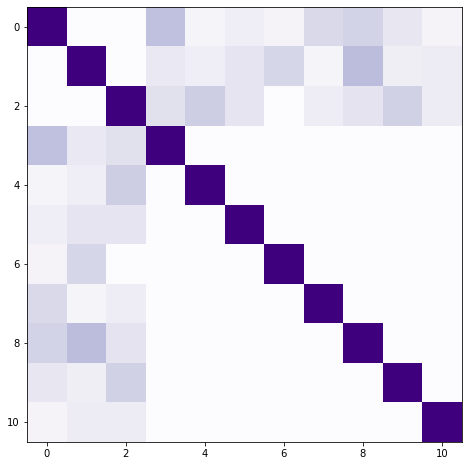

Similarity between two clusters by Sequence for test75 graph
Non-zero values average: 0.539962
---------------------------------------


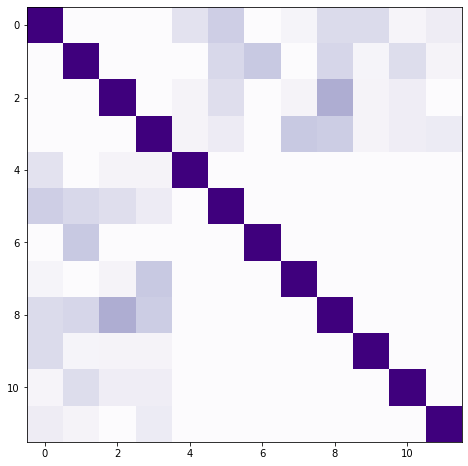

Similarity between two clusters by Sequence for test100 graph
Non-zero values average: 0.576846
---------------------------------------


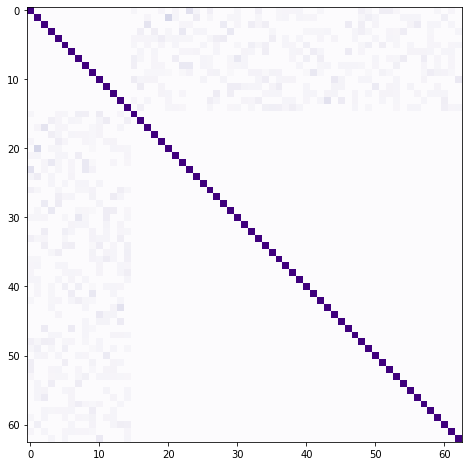

Similarity between two clusters by Sequence for test400 graph
Non-zero values average: 0.408561
---------------------------------------


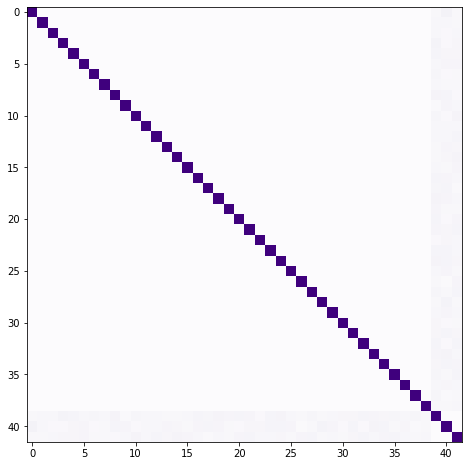

Similarity between two clusters by Sequence for test1000 graph
Non-zero values average: 0.817712
---------------------------------------


In [25]:
avg_A_A = []
for i in range(len(gs)):
    plt.figure(figsize=(8,8))
    plt.imshow(ratio_A_A[i], cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_A = nonzeroavg(ratio_A_A[i])
    print("Similarity between two clusters by Sequence for %s graph" % gnames[i])
    print("Non-zero values average: %f" % a_A_A)
    print(sprtr)
    avg_A_A.append(a_A_A)

Number of communities in test75 graph: 5
Labelprop Communities:
[[1, 6, 8, 15, 16, 17, 20, 21, 24, 28, 37, 43, 45, 46, 47, 50, 51, 52, 55, 57, 59, 60, 62, 63, 64, 70, 75], [2, 19, 39, 53, 56, 65, 66], [3, 4, 7, 11, 12, 13, 25, 31, 32, 33, 40, 44, 49, 71, 72], [5, 9, 10, 14, 23, 26, 27, 29, 30, 35, 36, 38, 48, 54, 58, 61, 69, 73, 74], [18, 22, 34, 41, 42, 67, 68]]
[[0.192, 0.062, 0.4, 0.5, 0.0], [0.577, 0.188, 0.15, 0.136, 0.062], [0.269, 0.188, 0.2, 0.227, 0.375], [0.0, 0.0, 0.0, 0.848, 0.0], [0.114, 0.0, 0.0, 0.0, 0.8], [0.0, 0.933, 0.0, 0.074, 0.0], [0.125, 0.0, 0.2, 0.083, 0.0], [0.176, 0.0, 0.273, 0.077, 0.0], [0.711, 0.0, 0.121, 0.0, 0.0], [0.054, 0.0, 0.64, 0.0, 0.118], [0.188, 0.0, 0.0, 0.167, 0.0]]


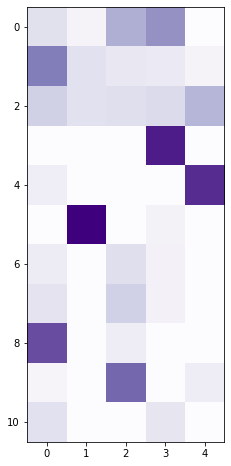

Non-zero values average: 0.409722
---------------------------------------
Number of communities in test100 graph: 5
Labelprop Communities:
[[1, 12, 25, 27, 39, 42, 44, 46, 62, 63, 78, 80, 84, 86, 92, 99, 100], [2, 3, 4, 5, 7, 11, 14, 15, 16, 17, 18, 20, 21, 23, 28, 30, 31, 33, 35, 37, 38, 47, 48, 49, 50, 52, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 67, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98], [6, 8, 10, 13, 19, 22, 24, 34, 41, 45, 56, 70], [9, 26, 29, 40, 43], [32, 36, 51, 53, 68, 69, 71]]
[[0.047, 0.353, 0.368, 0.129, 0.061], [0.698, 0.212, 0.053, 0.065, 0.0], [0.049, 0.482, 0.111, 0.0, 0.065], [0.0, 0.361, 0.111, 0.138, 0.323], [0.0, 0.0, 0.588, 0.0, 0.0], [0.105, 0.475, 0.0, 0.0, 0.0], [0.455, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.345, 0.62, 0.0, 0.0, 0.0], [0.0, 0.0, 0.737, 0.0, 0.0], [0.0, 0.265, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0]]


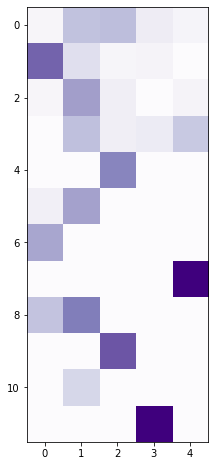

Non-zero values average: 0.467529
---------------------------------------
Number of communities in test400 graph: 14
Labelprop Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311, 318, 320, 328, 329, 336, 338, 339, 340, 341, 353, 354, 366], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [7, 12, 13, 29, 47, 48, 51, 52, 75, 100, 104, 107, 110, 111, 131, 132, 149, 160, 166, 173, 174, 180, 190, 201, 208, 209, 212, 217, 221, 222, 231, 236, 266, 271, 274, 275, 278, 293, 294, 295, 296, 297, 315, 317, 319, 324, 330, 331, 332, 334, 343, 356, 364], [10, 16, 19, 36, 41, 46, 55, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119

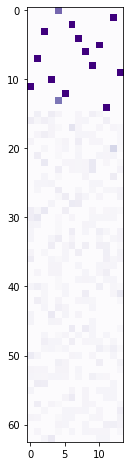

Non-zero values average: 0.216915
---------------------------------------
Number of communities in test1000 graph: 53
Labelprop Communities:
[[1, 117, 146, 151, 183, 217, 233, 280, 282, 308, 439, 455, 578, 621, 657, 699, 733, 756, 761, 764, 842, 865, 869, 896, 902, 909, 919, 968, 991], [2, 24, 26, 55, 58, 64, 79, 88, 92, 156, 162, 168, 201, 209, 210, 227, 234, 263, 278, 336, 342, 387, 395, 463, 479, 489, 523, 526, 533, 536, 542, 570, 581, 590, 611, 615, 665, 668, 689, 698, 724, 735, 748, 751, 757, 759, 766, 773, 777, 778, 791, 803, 806, 811, 848, 860, 871, 893, 913, 923, 941, 945, 951, 982], [3, 4, 14, 161, 174, 244, 250, 300, 338, 401, 416, 429, 444, 514, 594, 620, 654, 661, 712, 713, 746, 776, 785, 790, 798, 827, 904, 914, 954, 956], [5, 112, 319, 361, 373, 380, 502, 779, 817, 969, 976], [6, 376, 409, 553, 653, 682, 781, 792, 854], [7, 19, 180, 226, 266, 366, 372, 397, 398, 466, 473, 513, 524, 688, 691, 711, 738, 763, 809, 822, 861, 910, 939, 946, 979], [8, 12, 13, 16, 89, 98, 101, 1

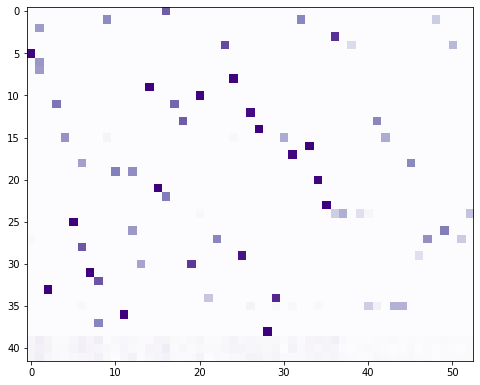

Non-zero values average: 0.596390
---------------------------------------


In [26]:
ratio_A_labelprop, avg_A_labelprop = [], []
for i in range(len(gs)):
    com_labelprop = get_comms(gs[i], "comm_labelprop")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_labelprop)))
    print("Labelprop Communities:")
    print(sorted(com_labelprop))
    r_A_labelprop = seq_match(com_A[i], com_labelprop)
    print(r_A_labelprop)
    ratio_A_labelprop.append(r_A_labelprop)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_labelprop, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_labelprop = nonzeroavg(r_A_labelprop)
    print("Non-zero values average: %f" % a_A_labelprop)
    avg_A_labelprop.append(a_A_labelprop)
    print(sprtr)

In [25]:
#Limiter variable can be used to threshold the low end of ratios.
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_labelprop[i], 250, com_A[i], get_comms(gs[i], "comm_labelprop"), limiter)

graph: test75
Sequental matching ratio: 0.933333
Index: 5 - 1
[2, 19, 39, 53, 56, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.848485
Index: 3 - 3
[5, 9, 10, 14, 23, 26, 27, 29, 30, 35, 36, 38, 48, 54, 58, 61, 69, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.800000
Index: 4 - 4
[18, 22, 34, 41, 42, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.711111
Index: 8 - 0
[1, 6, 8, 15, 16, 17, 20, 21, 24, 28, 37, 43, 45, 46, 47, 50, 51, 52, 55, 57, 59, 60, 62, 63, 64, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.640000
Index: 9 - 2
[3, 4, 7, 11, 12, 13, 25, 31, 32, 33, 40, 44, 49, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.576923
Index: 1 - 0
[1, 6, 8, 15, 16, 17, 20, 21, 24, 28, 37, 43, 45, 46, 47, 

Number of communities in test75 graph: 7
Spinglass Communities:
[[1, 21, 24, 35, 43, 54, 55, 59], [2, 6, 9, 18, 28, 34, 41, 42, 60, 63, 64, 67, 68], [3, 4, 7, 12, 13, 22, 25, 31, 32, 33, 40, 49, 71, 72], [5, 19, 39, 53, 56, 65, 66], [8, 15, 16, 17, 20, 37, 45, 46, 47, 50, 51, 52, 57, 62, 70, 75], [10, 14, 23, 26, 27, 29, 30, 36, 38, 48, 58, 61, 69, 73, 74], [11, 44]]
[[0.45, 0.0, 0.05263157894736842, 0.06060606060606061, 0.41025641025641024, 0.1951219512195122, 0.125], [0.15, 0.14814814814814814, 0.05263157894736842, 0.24242424242424243, 0.05128205128205128, 0.5365853658536586, 0.1875], [0.15, 0.0, 0.5789473684210527, 0.18181818181818182, 0.2564102564102564, 0.04878048780487805, 0.125], [0.896551724137931, 0.0, 0.07407407407407407, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.6666666666666666, 0.125, 0.0, 0.0, 0.0], [0.0, 0.0, 0.09523809523809523, 0.0, 0.0, 0.0, 0.9333333333333333], [0.1, 0.5714285714285714, 0.0, 0.0, 0.0, 0.19047619047619047, 0.0], [0.09090909090909091, 0.0, 0.1, 0.1333333333333

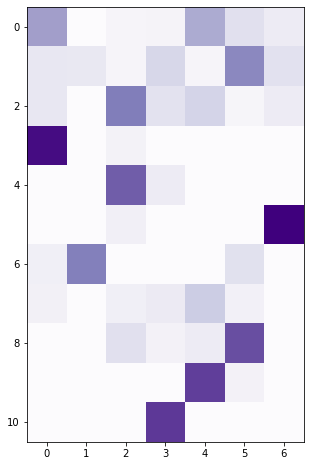

Non-zero values average: 0.419990
---------------------------------------
Number of communities in test100 graph: 7
Spinglass Communities:
[[1, 25, 27, 30, 31, 39, 44, 46, 54, 62, 63, 72, 78, 80, 84, 86, 92, 99, 100], [2, 14, 21, 28, 50, 52, 60, 75, 81], [3, 4, 6, 8, 10, 12, 13, 18, 19, 22, 24, 34, 41, 45, 48, 49, 56, 70, 76, 83, 97], [5, 15, 17, 23, 33, 59, 65, 66, 67, 73, 79, 82, 87, 88, 89], [7, 11, 16, 42, 57, 58, 61, 74, 77, 90, 91, 93], [9, 26, 29, 40, 43], [20, 32, 35, 36, 37, 38, 47, 51, 53, 55, 64, 68, 69, 71, 85, 94, 95, 96, 98]]
[[0.12903225806451613, 0.08888888888888889, 0.0, 0.6382978723404256, 0.2926829268292683, 0.05714285714285714, 0.0], [0.06451612903225806, 0.0, 0.7555555555555555, 0.0425531914893617, 0.14634146341463414, 0.22857142857142856, 0.0], [0.0, 0.09302325581395349, 0.09302325581395349, 0.08888888888888889, 0.2564102564102564, 0.12121212121212122, 0.6111111111111112], [0.13793103448275862, 0.6976744186046512, 0.0, 0.13333333333333333, 0.05128205128205128, 0.1

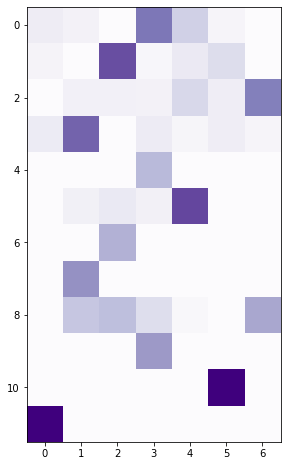

Non-zero values average: 0.447805
---------------------------------------
Number of communities in test400 graph: 16
Spinglass Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311, 318, 320, 328, 329, 336, 338, 339, 340, 341, 353, 354, 366], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [7, 12, 13, 29, 47, 48, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 174, 180, 190, 201, 208, 217, 231, 271, 275], [8], [10, 16, 19, 36, 41, 46, 55, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119, 136, 164, 167, 170, 171, 178, 181, 193, 194, 197, 198, 203, 220], [14, 26, 39, 40, 53, 66, 89, 125, 144, 148, 175, 184, 186, 189, 191, 

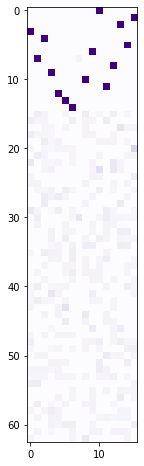

Non-zero values average: 0.194087
---------------------------------------
Number of communities in test1000 graph: 24
Spinglass Communities:
[[1, 117, 151, 183, 217, 233, 280, 282, 308, 439, 455, 578, 621, 657, 699, 733, 756, 761, 764, 842, 865, 869, 896, 902, 909, 919, 968, 991], [2, 24, 26, 64, 168, 209, 263, 387, 395, 523, 526, 590, 757, 759, 773, 777, 778, 811, 871, 893, 982], [3, 4, 14, 36, 42, 104, 138, 146, 160, 161, 244, 249, 250, 300, 323, 338, 349, 401, 405, 416, 429, 444, 462, 483, 484, 508, 514, 534, 594, 597, 620, 638, 654, 661, 676, 694, 712, 713, 719, 746, 776, 785, 790, 798, 827, 829, 831, 886, 901, 904, 906, 914, 918, 954, 956, 993], [5, 27, 69, 93, 112, 133, 224, 270, 309, 319, 361, 373, 380, 467, 502, 648, 683, 779, 817, 862, 969, 976, 992], [6, 50, 54, 134, 194, 212, 283, 289, 354, 358, 370, 376, 409, 419, 426, 437, 450, 451, 465, 480, 511, 553, 561, 585, 604, 639, 651, 653, 682, 737, 767, 781, 788, 789, 792, 797, 810, 854, 915, 926, 928, 936, 964, 965, 990, 997], [

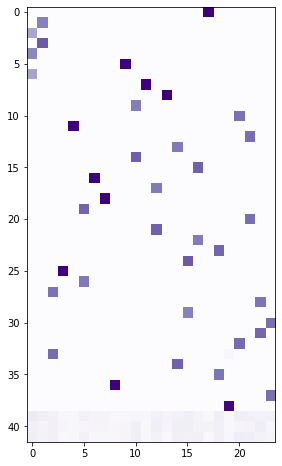

Non-zero values average: 0.631326
---------------------------------------


In [26]:
ratio_A_spinglass, avg_A_spinglass = [], []
for i in range(len(gs)):
    com_spinglass = get_comms(gs[i], "comm_spinglass")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_spinglass)))
    print("Spinglass Communities:")
    print(sorted(com_spinglass))
    r_A_spinglass = seq_match(com_A[i], com_spinglass)
    print(r_A_spinglass)
    ratio_A_spinglass.append(r_A_spinglass)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_spinglass, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_spinglass = nonzeroavg(r_A_spinglass)
    print("Non-zero values average: %f" % a_A_spinglass)
    avg_A_spinglass.append(a_A_spinglass)
    print(sprtr)

In [27]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_spinglass[i], 25, com_A[i], get_comms(gs[i], "comm_spinglass"), limiter)

graph: test75
Sequental matching ratio: 0.933333
Index: 5 - 6
[5, 19, 39, 53, 56, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.896552
Index: 3 - 0
[10, 14, 23, 26, 27, 29, 30, 36, 38, 48, 58, 61, 69, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.769231
Index: 10 - 3
[1, 21, 24, 35, 43, 54, 55, 59]
[1, 21, 35, 54, 55]
----------------------
Sequental matching ratio: 0.750000
Index: 9 - 4
[3, 4, 7, 12, 13, 22, 25, 31, 32, 33, 40, 49, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.705882
Index: 8 - 5
[8, 15, 16, 17, 20, 37, 45, 46, 47, 50, 51, 52, 57, 62, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.666667
Index: 4 - 2
[2, 6, 9, 18, 28, 34, 41, 42, 60, 63, 64, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ra

Number of communities in test75 graph: 6
Wakltrap Communities:
[[1, 10, 21, 24, 35, 54, 55], [2, 5, 8, 15, 16, 33, 37, 39, 43, 45, 46, 47, 50, 51, 52, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 70, 71, 75], [3, 31, 40], [4, 7, 9, 12, 13, 14, 20, 23, 25, 26, 27, 28, 29, 30, 32, 36, 38, 48, 49, 58, 69, 72, 73, 74], [6, 17, 18, 22, 34, 41, 42, 67, 68], [11, 19, 44]]
[[0.6122448979591837, 0.14814814814814814, 0.11764705882352941, 0.0625, 0.21428571428571427, 0.0], [0.04081632653061224, 0.6296296296296297, 0.058823529411764705, 0.1875, 0.0, 0.21428571428571427], [0.32653061224489793, 0.2962962962962963, 0.35294117647058826, 0.1875, 0.0, 0.0], [0.631578947368421, 0.046511627906976744, 0.0, 0.09523809523809523, 0.0, 0.0], [0.0, 0.05405405405405406, 0.8235294117647058, 0.0, 0.0, 0.0], [0.0, 0.3783783783783784, 0.0, 0.0, 0.0, 0.18181818181818182], [0.06896551724137931, 0.11764705882352941, 0.0, 0.0, 0.0, 0.5], [0.1935483870967742, 0.05555555555555555, 0.0, 0.14285714285714285, 0.4, 0.0], [0.09

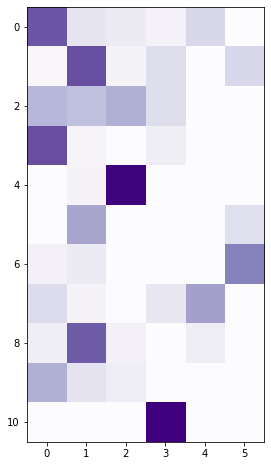

Non-zero values average: 0.389285
---------------------------------------
Number of communities in test100 graph: 10
Wakltrap Communities:
[[1, 25, 27, 39, 44], [2, 14, 21, 28, 50, 52, 60, 75, 81], [3, 20, 35, 37, 38, 47, 49, 55, 64, 74, 76, 83, 85, 94, 95, 96, 98], [4, 15, 17, 18, 23, 33, 54, 59, 65, 66, 67, 73, 79, 82, 87, 88, 89], [5, 12, 30, 31, 42, 46, 48, 62, 63, 72, 78, 80, 84, 86, 92, 97, 99, 100], [6, 10, 13, 24, 45, 56, 70], [7, 11, 16, 57, 58, 61, 77, 90, 91, 93], [8, 19, 22, 34, 41], [9, 26, 29, 40, 43], [32, 36, 51, 53, 68, 69, 71]]
[[0.32558139534883723, 0.18181818181818182, 0.18604651162790697, 0.06060606060606061, 0.0, 0.0, 0.05714285714285714, 0.24242424242424243, 0.1935483870967742, 0.12903225806451613], [0.18604651162790697, 0.5, 0.0, 0.0, 0.0, 0.3225806451612903, 0.22857142857142856, 0.06060606060606061, 0.0, 0.06451612903225806], [0.24390243902439024, 0.14285714285714285, 0.04878048780487805, 0.06451612903225806, 0.5882352941176471, 0.0, 0.12121212121212122, 0.0645

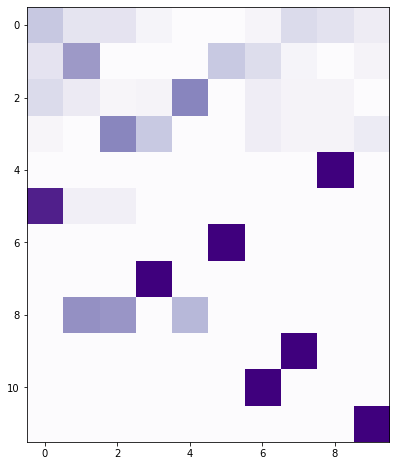

Non-zero values average: 0.661001
---------------------------------------
Number of communities in test400 graph: 15
Wakltrap Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311, 318, 320, 328, 329, 336, 338, 339, 340, 341, 353, 354, 366], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [7, 12, 13, 29, 47, 48, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 174, 180, 190, 201, 208, 217, 231, 271, 275], [10, 16, 19, 36, 41, 46, 55, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119, 136, 164, 167, 170, 171, 178, 181, 193, 194, 197, 198, 203, 220], [14, 26, 39, 40, 53, 66, 89, 125, 144, 148, 175, 184, 186, 189, 191, 192

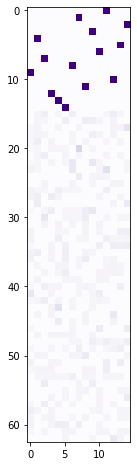

Non-zero values average: 0.185530
---------------------------------------
Number of communities in test1000 graph: 38
Wakltrap Communities:
[[1, 117, 151, 183, 217, 233, 280, 282, 308, 439, 455, 578, 621, 657, 699, 733, 756, 761, 764, 842, 865, 869, 896, 902, 909, 919, 968, 991], [2, 24, 26, 64, 168, 209, 263, 387, 395, 523, 526, 590, 757, 759, 773, 777, 778, 811, 871, 893, 982], [3, 4, 14, 161, 174, 244, 250, 300, 338, 401, 416, 429, 444, 514, 594, 620, 654, 661, 712, 713, 746, 776, 785, 790, 798, 827, 904, 914, 954, 956], [5, 27, 69, 93, 112, 133, 224, 270, 309, 319, 361, 373, 380, 467, 502, 648, 683, 779, 817, 862, 969, 976, 992], [6, 54, 134, 194, 289, 358, 376, 409, 437, 450, 451, 480, 511, 553, 604, 651, 653, 682, 767, 781, 792, 854, 926, 997], [7, 19, 180, 226, 266, 366, 372, 397, 398, 466, 473, 513, 524, 688, 691, 711, 738, 763, 809, 822, 861, 910, 939, 946, 979], [8, 12, 13, 89, 98, 175, 271, 284, 290, 350, 391, 449, 499, 500, 558, 637, 641, 743, 780, 839, 883, 927, 933, 935, 

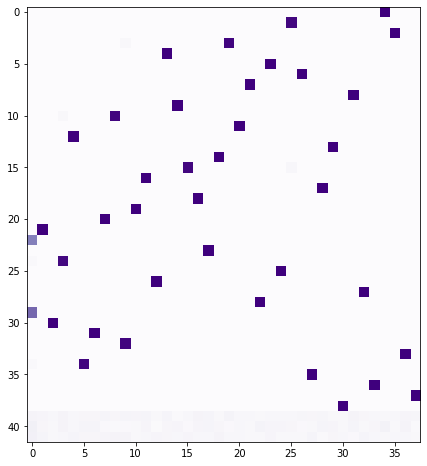

Non-zero values average: 0.805562
---------------------------------------


In [29]:
ratio_A_walktrap, avg_A_walktrap = [], []
for i in range(len(gs)):
    com_walktrap = get_comms(gs[i], "comm_walktrap")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_walktrap)))
    print("Wakltrap Communities:")
    print(sorted(com_walktrap))
    r_A_walktrap = seq_match(com_A[i], com_walktrap)
    print(r_A_walktrap)
    ratio_A_walktrap.append(r_A_walktrap)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_walktrap, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_walktrap = nonzeroavg(r_A_walktrap)
    print("Non-zero values average: %f" % a_A_walktrap)
    avg_A_walktrap.append(a_A_walktrap)
    print(sprtr)

In [72]:
tt = sorted(get_comm(gs[3], "Cluster_ID_A", 22))
tt = tt + (get_comm(gs[3], "Cluster_ID_A", 29))
print(sorted(tt))
print(sorted(get_comm(gs[3], "comm_walktrap", 0)))

[41, 44, 50, 182, 199, 212, 283, 311, 312, 354, 410, 411, 419, 425, 426, 431, 453, 454, 464, 465, 476, 561, 585, 616, 639, 669, 725, 737, 739, 752, 788, 789, 797, 810, 813, 866, 872, 891, 898, 903, 915, 928, 936, 964, 965, 990]
[41, 44, 50, 153, 182, 199, 212, 283, 311, 312, 354, 408, 410, 411, 419, 425, 426, 431, 453, 454, 464, 465, 476, 561, 585, 616, 639, 669, 725, 737, 739, 752, 788, 789, 797, 810, 813, 866, 872, 891, 898, 903, 915, 928, 936, 964, 965, 990]


In [30]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_walktrap[i], 25, com_A[i], get_comms(gs[i], "comm_walktrap"), limiter)

graph: test75
Sequental matching ratio: 0.833333
Index: 10 - 3
[1, 10, 21, 24, 35, 54, 55]
[1, 21, 35, 54, 55]
----------------------
Sequental matching ratio: 0.823529
Index: 4 - 2
[6, 17, 18, 22, 34, 41, 42, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.631579
Index: 3 - 0
[4, 7, 9, 12, 13, 14, 20, 23, 25, 26, 27, 28, 29, 30, 32, 36, 38, 48, 49, 58, 69, 72, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.629630
Index: 1 - 1
[2, 5, 8, 15, 16, 33, 37, 39, 43, 45, 46, 47, 50, 51, 52, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 70, 71, 75]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.612245
Index: 0 - 0
[4, 7, 9, 12, 13, 14, 20, 23, 25, 26, 27, 28, 29, 30, 32, 36, 38, 48, 49, 58, 69, 72, 73, 74]
[3, 4, 5, 6, 8, 12, 13, 17, 20, 26, 27, 29, 30, 31, 35, 36, 39, 40, 48, 49, 58,

Number of communities in test75 graph: 6
Louvain Communities:
[[1, 21, 24, 35, 43, 54, 55, 59], [2, 5, 19, 39, 53, 56, 65, 66], [3, 4, 7, 11, 12, 13, 25, 28, 31, 32, 33, 36, 40, 44, 49, 71, 72], [6, 17, 18, 22, 34, 41, 42, 67, 68], [8, 15, 16, 20, 37, 45, 46, 47, 50, 51, 52, 57, 60, 62, 63, 64, 70, 75], [9, 10, 14, 23, 26, 27, 29, 30, 38, 48, 58, 61, 69, 73, 74]]
[[0.12121212121212122, 0.06060606060606061, 0.11764705882352941, 0.42857142857142855, 0.4, 0.13953488372093023], [0.18181818181818182, 0.24242424242424243, 0.058823529411764705, 0.14285714285714285, 0.15, 0.5116279069767442], [0.18181818181818182, 0.18181818181818182, 0.35294117647058826, 0.23809523809523808, 0.2, 0.18604651162790697], [0.0, 0.0, 0.0, 0.0, 0.9655172413793104, 0.0], [0.0, 0.125, 0.8235294117647058, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.18181818181818182, 0.1, 0.17391304347826086], [0.0, 0.13333333333333333, 0.0, 0.4166666666666667, 0.0, 0.08], [0.0, 0.07692307692307693, 0.07407407407

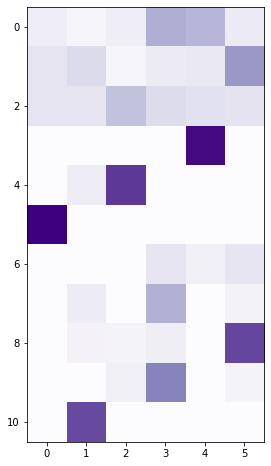

Non-zero values average: 0.405118
---------------------------------------
Number of communities in test100 graph: 7
Louvain Communities:
[[1, 25, 27, 30, 31, 39, 44, 46, 54, 62, 63, 72, 78, 80, 84, 86, 92, 99, 100], [2, 14, 21, 28, 50, 52, 57, 60, 75, 81], [3, 4, 6, 8, 10, 12, 13, 19, 22, 24, 34, 41, 45, 48, 49, 56, 70, 76, 77, 97], [5, 15, 17, 18, 23, 33, 65, 66, 67, 73, 79, 82, 87, 88, 89], [7, 11, 16, 35, 42, 47, 58, 59, 61, 83, 90, 91, 93], [9, 26, 29, 40, 43], [20, 32, 36, 37, 38, 51, 53, 55, 64, 68, 69, 71, 74, 85, 94, 95, 96, 98]]
[[0.12903225806451613, 0.05555555555555555, 0.34146341463414637, 0.05128205128205128, 0.5652173913043478, 0.09090909090909091, 0.0], [0.06451612903225806, 0.2222222222222222, 0.14634146341463414, 0.0, 0.043478260869565216, 0.0, 0.7555555555555555], [0.0, 0.17647058823529413, 0.20512820512820512, 0.5405405405405406, 0.13636363636363635, 0.09523809523809523, 0.09302325581395349], [0.13793103448275862, 0.11764705882352941, 0.05128205128205128, 0.108108108

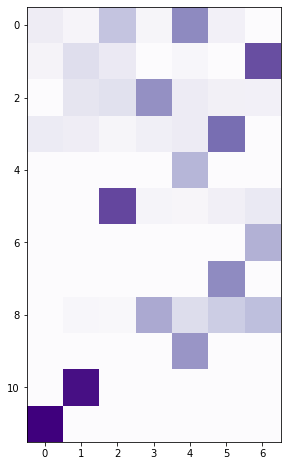

Non-zero values average: 0.445437
---------------------------------------
Number of communities in test400 graph: 15
Louvain Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311, 318, 320, 328, 329, 336, 338, 339, 340, 341, 353, 354, 366], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [7, 12, 13, 29, 47, 48, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 174, 180, 190, 201, 208, 217, 231, 271, 275], [10, 16, 19, 36, 41, 46, 55, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119, 136, 164, 167, 170, 171, 178, 181, 193, 194, 197, 198, 203, 220], [14, 26, 39, 40, 53, 66, 89, 125, 144, 148, 175, 184, 186, 189, 191, 192,

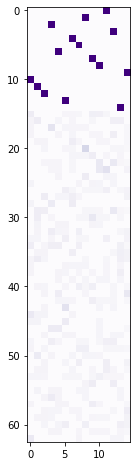

Non-zero values average: 0.238630
---------------------------------------
Number of communities in test1000 graph: 27
Louvain Communities:
[[1, 117, 151, 183, 217, 233, 280, 282, 308, 439, 455, 578, 621, 657, 699, 733, 756, 761, 764, 842, 865, 869, 896, 902, 909, 919, 968, 991], [2, 5, 11, 24, 26, 27, 63, 64, 69, 93, 112, 123, 133, 154, 168, 190, 209, 224, 245, 260, 263, 270, 307, 309, 319, 353, 361, 373, 378, 380, 387, 395, 396, 467, 502, 523, 526, 590, 627, 633, 648, 679, 683, 704, 706, 757, 759, 773, 777, 778, 779, 811, 817, 825, 835, 862, 871, 893, 900, 908, 944, 969, 976, 977, 982, 992], [3, 4, 14, 161, 174, 244, 250, 300, 338, 401, 416, 429, 444, 514, 594, 620, 654, 661, 712, 713, 746, 776, 785, 790, 798, 827, 904, 914, 954, 956], [6, 25, 30, 53, 54, 74, 128, 134, 148, 176, 191, 194, 253, 273, 285, 289, 292, 335, 358, 370, 376, 383, 409, 412, 434, 437, 445, 450, 451, 480, 511, 549, 551, 553, 604, 613, 628, 651, 653, 682, 693, 767, 775, 781, 792, 794, 816, 840, 854, 926, 966, 997]

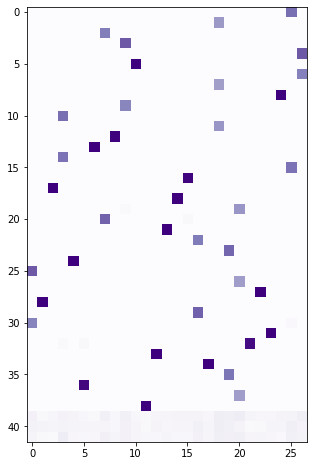

Non-zero values average: 0.607179
---------------------------------------


In [31]:
ratio_A_louvain, avg_A_louvain = [], []
for i in range(len(gs)):
    com_louvain = get_comms(gs[i], "comm_louvain")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_louvain)))
    print("Louvain Communities:")
    print(sorted(com_louvain))
    r_A_louvain = seq_match(com_A[i], com_louvain)
    print(r_A_louvain)
    ratio_A_louvain.append(r_A_louvain)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_louvain, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_louvain = nonzeroavg(r_A_louvain)
    print("Non-zero values average: %f" % a_A_louvain)
    avg_A_louvain.append(a_A_louvain)
    print(sprtr)

In [32]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_louvain[i], 25, com_A[i], get_comms(gs[i], "comm_louvain"), limiter)

graph: test75
Sequental matching ratio: 1.000000
Index: 5 - 0
[2, 5, 19, 39, 53, 56, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.965517
Index: 3 - 4
[9, 10, 14, 23, 26, 27, 29, 30, 38, 48, 58, 61, 69, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.823529
Index: 4 - 2
[6, 17, 18, 22, 34, 41, 42, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.777778
Index: 8 - 5
[8, 15, 16, 20, 37, 45, 46, 47, 50, 51, 52, 57, 60, 62, 63, 64, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.769231
Index: 10 - 1
[1, 21, 24, 35, 43, 54, 55, 59]
[1, 21, 35, 54, 55]
----------------------
Sequental matching ratio: 0.592593
Index: 9 - 3
[3, 4, 7, 11, 12, 13, 25, 28, 31, 32, 33, 36, 40, 44, 49, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental mat

Number of communities in test75 graph: 8
Infomap Communities:
[[1, 21, 24, 35, 43, 54, 55, 59], [2, 5, 39, 53, 56, 65, 66], [3, 28, 31, 36, 40, 49], [4, 7, 12, 13, 25, 32, 33, 71, 72], [6, 17, 18, 22, 34, 41, 42, 67, 68], [8, 15, 16, 20, 37, 45, 46, 47, 50, 51, 52, 57, 60, 62, 63, 64, 70, 75], [9, 10, 14, 23, 26, 27, 29, 30, 38, 48, 58, 61, 69, 73, 74], [11, 19, 44]]
[[0.13953488372093023, 0.4, 0.23529411764705882, 0.11764705882352941, 0.125, 0.06060606060606061, 0.3225806451612903, 0.0], [0.5116279069767442, 0.15, 0.058823529411764705, 0.058823529411764705, 0.125, 0.24242424242424243, 0.0, 0.21428571428571427], [0.18604651162790697, 0.2, 0.23529411764705882, 0.35294117647058826, 0.1875, 0.18181818181818182, 0.06451612903225806, 0.0], [0.0, 0.9655172413793104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.8235294117647058, 0.0, 0.125, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.9333333333333333, 0.0, 0.0, 0.18181818181818182], [0.17391304347826086, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.08, 0

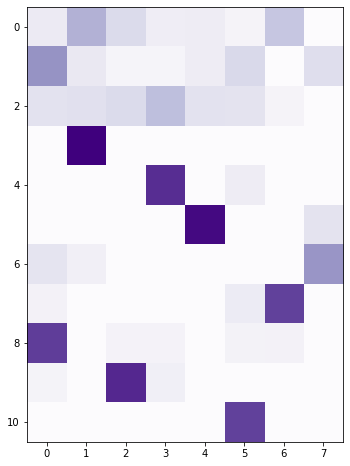

Non-zero values average: 0.466571
---------------------------------------
Number of communities in test100 graph: 7
Infomap Communities:
[[1, 25, 27, 39, 44], [2, 14, 21, 28, 50, 52, 60, 75, 81], [3, 4, 5, 7, 11, 12, 15, 16, 17, 18, 20, 23, 30, 31, 33, 35, 37, 38, 42, 46, 47, 48, 49, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [6, 10, 13, 24, 45, 56, 70], [8, 19, 22, 34, 41], [9, 26, 29, 40, 43], [32, 36, 51, 53, 68, 69, 71]]
[[0.3409090909090909, 0.05714285714285714, 0.06060606060606061, 0.24242424242424243, 0.12903225806451613, 0.1935483870967742, 0.0], [0.3409090909090909, 0.22857142857142856, 0.0, 0.06060606060606061, 0.06451612903225806, 0.0, 0.3225806451612903], [0.4418604651162791, 0.12121212121212122, 0.06451612903225806, 0.06451612903225806, 0.0, 0.06896551724137931, 0.0], [0.3023255813953488, 0.12121212121212122, 0.3225806451612903, 0.06451612903225806, 0.13793103

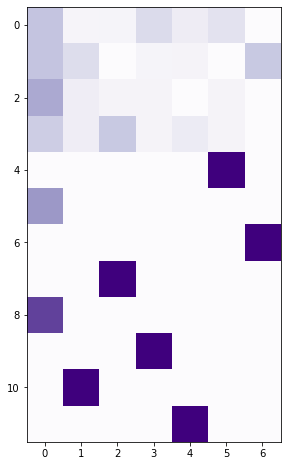

Non-zero values average: 0.696210
---------------------------------------
Number of communities in test400 graph: 15
Infomap Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311, 318, 320, 328, 329, 336, 338, 339, 340, 341, 353, 354, 366], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [7, 12, 13, 29, 47, 48, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 174, 180, 190, 201, 208, 217, 231, 271, 275], [10, 16, 19, 36, 41, 46, 55, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119, 136, 164, 167, 170, 171, 178, 181, 193, 194, 197, 198, 203, 220], [14, 26, 39, 40, 53, 66, 89, 125, 144, 148, 175, 184, 186, 189, 191, 192,

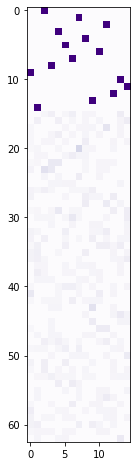

Non-zero values average: 0.172015
---------------------------------------
Number of communities in test1000 graph: 39
Infomap Communities:
[[1, 117, 151, 183, 217, 233, 280, 282, 308, 439, 455, 578, 621, 657, 699, 733, 756, 761, 764, 842, 865, 869, 896, 902, 909, 919, 968, 991], [2, 24, 26, 64, 168, 209, 263, 387, 395, 523, 526, 590, 757, 759, 773, 777, 778, 811, 871, 893, 982], [3, 4, 14, 161, 174, 244, 250, 300, 338, 401, 416, 429, 444, 514, 594, 620, 654, 661, 712, 713, 746, 776, 785, 790, 798, 827, 904, 914, 954, 956], [5, 27, 69, 93, 112, 133, 224, 270, 309, 319, 361, 373, 380, 467, 502, 648, 683, 779, 817, 862, 969, 976, 992], [6, 54, 134, 194, 289, 358, 370, 376, 409, 437, 450, 451, 480, 511, 553, 604, 651, 653, 682, 767, 781, 792, 854, 926, 997], [7, 19, 180, 226, 266, 366, 372, 397, 398, 466, 473, 513, 524, 688, 691, 711, 738, 763, 809, 822, 861, 910, 939, 946, 979], [8, 12, 13, 89, 98, 175, 271, 284, 290, 350, 391, 449, 499, 500, 558, 637, 641, 743, 780, 839, 883, 927, 933, 9

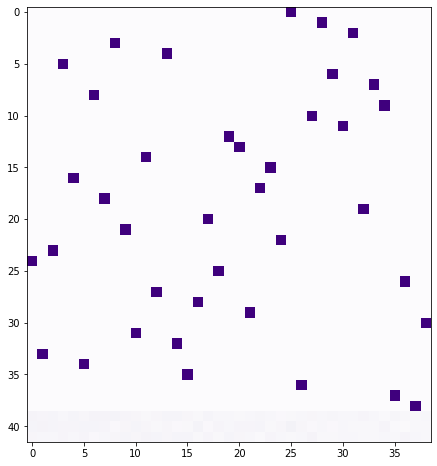

Non-zero values average: 0.809355
---------------------------------------


In [33]:
ratio_A_infomap, avg_A_infomap = [], []
for i in range(len(gs)):
    com_infomap = get_comms(gs[i], "comm_infomap")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_infomap)))
    print("Infomap Communities:")
    print(sorted(com_infomap))
    r_A_infomap = seq_match(com_A[i], com_infomap)
    print(r_A_infomap)
    ratio_A_infomap.append(r_A_infomap)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_infomap, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_infomap = nonzeroavg(r_A_infomap)
    print("Non-zero values average: %f" % a_A_infomap)
    avg_A_infomap.append(a_A_infomap)
    print(sprtr)

In [34]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_infomap[i], 25, com_A[i], get_comms(gs[i], "comm_infomap"), limiter)

graph: test75
Sequental matching ratio: 0.965517
Index: 3 - 1
[9, 10, 14, 23, 26, 27, 29, 30, 38, 48, 58, 61, 69, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.933333
Index: 5 - 4
[2, 5, 39, 53, 56, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.842105
Index: 9 - 2
[4, 7, 12, 13, 25, 32, 33, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.823529
Index: 4 - 3
[6, 17, 18, 22, 34, 41, 42, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.777778
Index: 8 - 0
[8, 15, 16, 20, 37, 45, 46, 47, 50, 51, 52, 57, 60, 62, 63, 64, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.769231
Index: 7 - 6
[3, 28, 31, 36, 40, 49]
[24, 28, 31, 36, 40, 45, 49]
----------------------
Sequental matching ratio: 0.769231
Index: 10 - 5

Number of communities in test75 graph: 3
Asynchronous Fluid (A) Communities:
[[1, 4, 7, 9, 10, 14, 18, 21, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 48, 49, 54, 55, 58, 69, 72, 73, 74], [2, 3, 5, 8, 13, 15, 20, 28, 31, 39, 40, 41, 43, 45, 47, 51, 53, 57, 60, 62, 63, 64, 65, 67, 70, 75], [6, 11, 12, 16, 17, 19, 22, 23, 33, 37, 42, 44, 46, 50, 52, 56, 59, 61, 66, 68, 71]]
[[0.49056603773584906, 0.35294117647058826, 0.13043478260869565], [0.11320754716981132, 0.27450980392156865, 0.6521739130434783], [0.4528301886792453, 0.39215686274509803, 0.13043478260869565], [0.5714285714285714, 0.0, 0.11428571428571428], [0.1111111111111111, 0.11764705882352941, 0.27586206896551724], [0.0, 0.29411764705882354, 0.20689655172413793], [0.06060606060606061, 0.0, 0.3076923076923077], [0.17142857142857143, 0.24242424242424243, 0.0], [0.0, 0.6818181818181818, 0.15384615384615385], [0.2631578947368421, 0.0, 0.3225806451612903], [0.30303030303030304, 0.0, 0.0]]


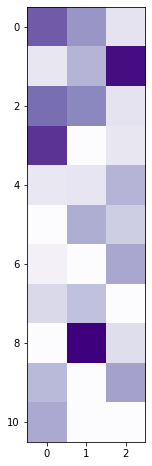

Non-zero values average: 0.317011
---------------------------------------
Number of communities in test100 graph: 4
Asynchronous Fluid (A) Communities:
[[1, 2, 14, 15, 17, 21, 25, 27, 28, 39, 43, 44, 46, 50, 52, 57, 60, 62, 67, 75, 78, 81, 82, 99, 100], [3, 4, 9, 20, 26, 36, 37, 40, 47, 49, 51, 53, 59, 64, 66, 68, 69, 71, 74, 76, 94, 95, 96, 98], [5, 7, 11, 16, 18, 23, 30, 31, 35, 42, 54, 55, 58, 61, 63, 72, 77, 80, 83, 84, 85, 86, 90, 91, 92, 93], [6, 8, 10, 12, 13, 19, 22, 24, 29, 32, 33, 34, 38, 41, 45, 48, 56, 65, 70, 73, 79, 87, 88, 89, 97]]
[[0.16, 0.7058823529411765, 0.11538461538461539, 0.0392156862745098], [0.0, 0.0392156862745098, 0.2692307692307692, 0.7058823529411765], [0.16666666666666666, 0.16326530612244897, 0.52, 0.12244897959183673], [0.6666666666666666, 0.08163265306122448, 0.12, 0.12244897959183673], [0.0, 0.3333333333333333, 0.0, 0.0], [0.2222222222222222, 0.30434782608695654, 0.1276595744680851, 0.2608695652173913], [0.0, 0.0, 0.0, 0.3333333333333333], [0.387096774

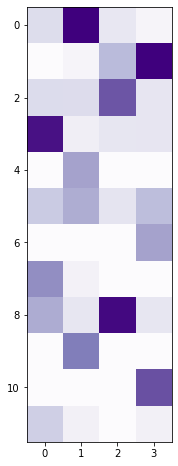

Non-zero values average: 0.387886
---------------------------------------
Number of communities in test400 graph: 15
Asynchronous Fluid (A) Communities:
[[1, 4, 5, 6, 9, 21, 22, 24, 27, 28, 30, 35, 37, 38, 42, 43, 44, 45, 50, 54, 58, 65, 68, 69, 74, 76, 77, 78, 80, 81, 88, 90, 93, 94, 95, 97, 99, 103, 105, 108, 113, 133, 145, 162], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 205, 241, 262, 263, 283, 311, 329, 338, 354], [7, 12, 13, 29, 47, 48, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 174, 180, 190, 201, 208, 217, 231, 271, 275], [10, 16, 19, 36, 41, 46, 55, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119, 136, 164, 167, 170, 171, 178, 181, 193, 194, 197, 198, 203, 220, 346, 347, 351, 352, 355, 357, 361, 362, 363, 365, 368, 369, 371, 372, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 

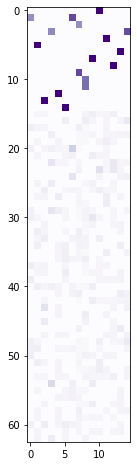

Non-zero values average: 0.205445
---------------------------------------
Number of communities in test1000 graph: 39
Asynchronous Fluid (A) Communities:
[[1, 109, 117, 151, 183, 233, 308, 455, 482, 492, 578, 593, 621, 657, 699, 733, 756, 761, 764, 820, 833, 842, 865, 869, 896, 902, 909, 919, 968, 991], [2, 19, 24, 168, 209, 243, 245, 263, 387, 395, 473, 513, 523, 526, 565, 590, 625, 757, 759, 763, 773, 777, 778, 783, 809, 811, 822, 871, 893, 939, 979, 982], [3, 46, 51, 64, 127, 252, 259, 313, 338, 358, 401, 515, 594, 595, 626, 661, 765, 776, 792, 793, 798, 827, 838, 900, 978], [4, 11, 23, 37, 45, 49, 110, 154, 200, 297, 305, 337, 351, 367, 414, 417, 447, 468, 497, 528, 602, 627, 671, 796, 953, 975, 986], [5, 27, 33, 93, 126, 163, 193, 220, 224, 258, 270, 275, 309, 319, 361, 380, 467, 502, 509, 512, 531, 588, 610, 647, 650, 659, 683, 700, 779, 782, 801, 819, 862, 897, 969, 976, 992, 996], [6, 25, 69, 90, 124, 148, 172, 176, 191, 273, 341, 364, 368, 373, 412, 481, 573, 583, 648, 677, 78

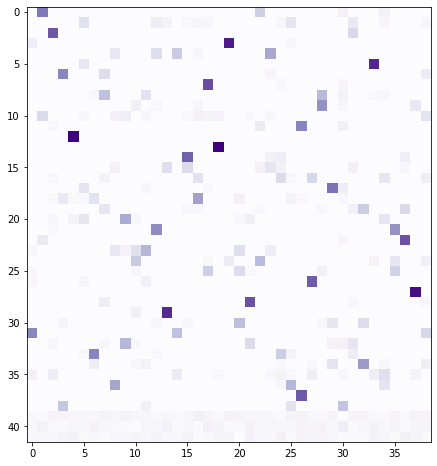

Non-zero values average: 0.275002
---------------------------------------


In [35]:
ratio_A_asynfluid_a, avg_A_asynfluid_a = [], []
for i in range(len(gs)):
    com_asynfluid_a = get_comms(gs[i], "nasynfluida")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_asynfluid_a)))
    print("Asynchronous Fluid (A) Communities:")
    print(sorted(com_asynfluid_a))
    r_A_asynfluid_a = seq_match(com_A[i], com_asynfluid_a)
    print(r_A_asynfluid_a)
    ratio_A_asynfluid_a.append(r_A_asynfluid_a)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_asynfluid_a, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_asynfluid_a = nonzeroavg(r_A_asynfluid_a)
    print("Non-zero values average: %f" % a_A_asynfluid_a)
    avg_A_asynfluid_a.append(a_A_asynfluid_a)
    print(sprtr)

In [36]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_asynfluid_a[i], 25, com_A[i], get_comms(gs[i], "nasynfluida"), limiter)

graph: test75
Sequental matching ratio: 0.681818
Index: 8 - 1
[2, 3, 5, 8, 13, 15, 20, 28, 31, 39, 40, 41, 43, 45, 47, 51, 53, 57, 60, 62, 63, 64, 65, 67, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.652174
Index: 1 - 2
[6, 11, 12, 16, 17, 19, 22, 23, 33, 37, 42, 44, 46, 50, 52, 56, 59, 61, 66, 68, 71]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.571429
Index: 3 - 0
[1, 4, 7, 9, 10, 14, 18, 21, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 48, 49, 54, 55, 58, 69, 72, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.490566
Index: 0 - 0
[1, 4, 7, 9, 10, 14, 18, 21, 24, 25, 26, 27, 29, 30, 32, 34, 35, 36, 38, 48, 49, 54, 55, 58, 69, 72, 73, 74]
[3, 4, 5, 6, 8, 12, 13, 17, 20, 26, 27, 29, 30, 31, 35, 36, 39, 40, 48, 49, 58, 62, 69, 72, 73]

Number of communities in test75 graph: 8
Asynchronous Fluid (B) Communities:
[[1, 10, 42, 43, 55, 59, 67], [2, 4, 5, 37, 39, 44, 46, 65, 66], [3, 13, 16, 20, 45, 47, 51, 52, 57, 70, 75], [6, 11, 17, 19, 27, 62], [7, 12, 22, 25, 32, 50, 71, 72], [8, 15, 18, 21, 28, 31, 34, 36, 40, 49, 60, 64], [9, 23, 24, 33, 41, 53, 54, 56, 63, 68], [14, 26, 29, 30, 35, 38, 48, 58, 61, 69, 73, 74]]
[[0.43243243243243246, 0.0, 0.12121212121212122, 0.25806451612903225, 0.2702702702702703, 0.16666666666666666, 0.0, 0.17647058823529413], [0.05405405405405406, 0.11428571428571428, 0.12121212121212122, 0.12903225806451613, 0.05405405405405406, 0.3888888888888889, 0.375, 0.23529411764705882], [0.16216216216216217, 0.45714285714285713, 0.24242424242424243, 0.0, 0.32432432432432434, 0.05555555555555555, 0.0625, 0.11764705882352941], [0.8461538461538461, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.09523809523809523, 0.0], [0.0, 0.2222222222222222, 0.0, 0.14285714285714285, 0.2, 0.0, 0.4, 0.0], [0.0, 0.22222222222

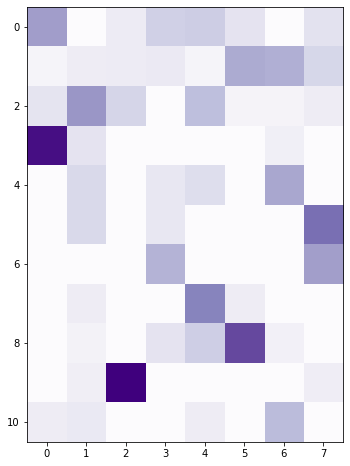

Non-zero values average: 0.320840
---------------------------------------
Number of communities in test100 graph: 12
Asynchronous Fluid (B) Communities:
[[1, 25, 27, 39, 44, 54, 92, 99, 100], [2, 14, 21, 28, 37, 50, 52, 60, 75, 81], [3, 18, 20, 35, 47, 49, 76, 83, 98], [4, 17, 59, 65, 66, 73, 87, 89, 95, 96], [5, 8, 22, 31, 34, 41, 72, 78, 86, 97], [6, 10, 13, 33, 56, 67, 70, 88], [7, 16, 48, 57, 58, 61, 63, 74, 77, 80, 90], [9, 26, 29, 40, 43], [11, 30, 38, 55, 62, 64, 84, 85, 93, 94], [12, 24, 42, 45, 91], [15, 19, 23, 46, 79, 82], [32, 36, 51, 53, 68, 69, 71]]
[[0.06060606060606061, 0.05405405405405406, 0.12903225806451613, 0.12903225806451613, 0.05555555555555555, 0.2222222222222222, 0.29411764705882354, 0.2777777777777778, 0.0, 0.0, 0.05555555555555555, 0.22857142857142856], [0.0, 0.10810810810810811, 0.06451612903225806, 0.0, 0.2222222222222222, 0.05555555555555555, 0.11764705882352941, 0.16666666666666666, 0.5142857142857142, 0.125, 0.1111111111111111, 0.0], [0.06451612903225806

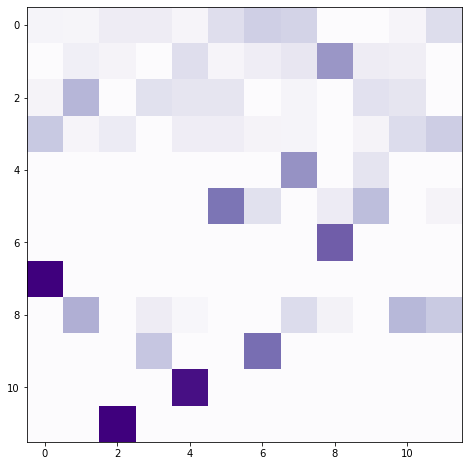

Non-zero values average: 0.452680
---------------------------------------
Number of communities in test400 graph: 48
Asynchronous Fluid (B) Communities:
[[1, 4, 6, 21, 22, 24, 28, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 127, 140, 243, 308], [3, 49, 109, 196, 252, 255, 262, 263, 283, 320, 328, 329, 341, 354], [5, 9, 30, 45, 80], [7, 47, 75, 166, 180, 208], [8, 121, 245, 248, 261, 267, 281, 289, 298, 327], [10, 36, 79, 163, 185], [11, 61, 118, 178, 181, 193, 203], [12, 48, 160, 275], [13, 29, 174, 190, 217], [14, 40, 53, 125, 148, 175, 186, 206, 207, 224, 247, 269, 270, 309], [15, 18, 59, 126, 138, 151, 161, 169, 176, 183, 218], [16, 46, 55, 70, 130, 156], [17, 147, 253, 268, 276, 277, 325, 337, 350], [19, 101, 128, 141, 142, 154, 165], [20, 116, 124, 143, 158, 182, 210, 227, 230, 238, 288, 306, 314, 316], [23, 137, 150, 187, 244, 301, 326, 333, 344, 367], [25, 34, 82, 83, 234, 249, 304, 310], [26, 66, 89, 144, 184, 189, 191, 192, 226, 228, 284], [27, 58, 65, 81,

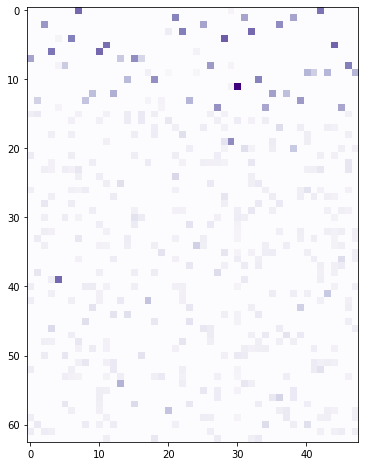

Non-zero values average: 0.230121
---------------------------------------
Number of communities in test1000 graph: 3
Asynchronous Fluid (B) Communities:
[[1, 5, 8, 12, 13, 22, 26, 27, 35, 41, 44, 46, 47, 48, 50, 53, 54, 57, 66, 67, 69, 76, 82, 84, 85, 87, 89, 90, 93, 96, 98, 109, 113, 117, 121, 122, 123, 125, 126, 127, 128, 130, 131, 134, 135, 142, 145, 146, 151, 154, 164, 165, 168, 170, 171, 172, 174, 175, 180, 181, 182, 186, 189, 194, 195, 197, 198, 199, 202, 206, 207, 212, 214, 225, 230, 232, 237, 239, 241, 243, 245, 247, 250, 252, 259, 260, 264, 265, 268, 270, 271, 274, 275, 280, 282, 283, 284, 289, 290, 293, 295, 302, 306, 308, 309, 311, 312, 314, 319, 321, 325, 329, 332, 335, 341, 345, 346, 348, 350, 354, 358, 361, 362, 363, 368, 370, 373, 376, 378, 380, 381, 383, 386, 389, 390, 391, 396, 398, 399, 401, 402, 410, 411, 416, 419, 420, 425, 426, 431, 432, 433, 434, 436, 439, 440, 443, 449, 450, 453, 454, 456, 457, 458, 460, 461, 464, 465, 467, 470, 471, 476, 478, 480, 481, 485, 487,

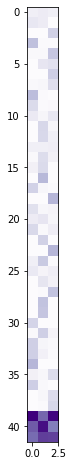

Non-zero values average: 0.106569
---------------------------------------


In [37]:
ratio_A_asynfluid_b, avg_A_asynfluid_b = [], []
for i in range(len(gs)):
    com_asynfluid_b = get_comms(gs[i], "nasynfluidb")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_asynfluid_b)))
    print("Asynchronous Fluid (B) Communities:")
    print(sorted(com_asynfluid_b))
    r_A_asynfluid_b = seq_match(com_A[i], com_asynfluid_b)
    print(r_A_asynfluid_b)
    ratio_A_asynfluid_b.append(r_A_asynfluid_b)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_asynfluid_b, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_asynfluid_b = nonzeroavg(r_A_asynfluid_b)
    print("Non-zero values average: %f" % a_A_asynfluid_b)
    avg_A_asynfluid_b.append(a_A_asynfluid_b)
    print(sprtr)

In [38]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_asynfluid_b[i], 25, com_A[i], get_comms(gs[i], "nasynfluidb"), limiter)

graph: test75
Sequental matching ratio: 0.888889
Index: 9 - 2
[7, 12, 22, 25, 32, 50, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.846154
Index: 3 - 0
[14, 26, 29, 30, 35, 38, 48, 58, 61, 69, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.689655
Index: 8 - 5
[3, 13, 16, 20, 45, 47, 51, 52, 57, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.588235
Index: 5 - 7
[2, 4, 5, 37, 39, 44, 46, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.526316
Index: 7 - 4
[8, 15, 18, 21, 28, 31, 34, 36, 40, 49, 60, 64]
[24, 28, 31, 36, 40, 45, 49]
----------------------
Sequental matching ratio: 0.457143
Index: 2 - 1
[9, 23, 24, 33, 41, 53, 54, 56, 63, 68]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74]
------------

Number of communities in test75 graph: 11
Asynchronous Fluid (AB) Communities:
[[1, 42, 50, 55, 59], [2, 5, 39, 53, 56, 65, 66], [3, 7, 12, 13, 16, 31, 32, 33, 40, 71, 72], [4, 27, 37, 44, 46], [6, 11, 17, 43], [8, 21, 24, 62, 63, 64], [9, 18, 22, 34, 35, 41, 67, 68], [10, 14, 19, 47, 51, 52], [15, 20, 28, 45, 57, 60, 70, 75], [23, 25, 30, 48, 54, 74], [26, 29, 36, 38, 49, 58, 61, 69, 73]]
[[0.044444444444444446, 0.055710306406685235, 0.04456824512534819], [0.06741573033707865, 0.056338028169014086, 0.0], [0.0, 0.0, 0.11864406779661017], [0.1487603305785124, 0.0055248618784530384, 0.0055248618784530384], [0.011019283746556474, 0.011049723756906077, 0.13812154696132597], [0.0, 0.07202216066481995, 0.08310249307479224], [0.0, 0.0, 0.12394366197183099], [0.011267605633802818, 0.01694915254237288, 0.0903954802259887], [0.15426997245179064, 0.0055248618784530384, 0.0], [0.10140845070422536, 0.005649717514124294, 0.011299435028248588], [0.060941828254847646, 0.022222222222222223, 0.066666666

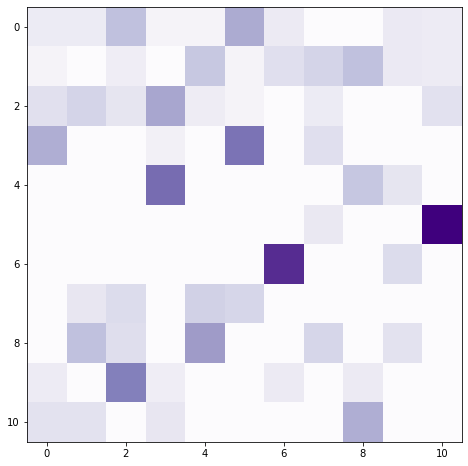

Non-zero values average: 0.351509
---------------------------------------
Number of communities in test100 graph: 16
Asynchronous Fluid (AB) Communities:
[[1, 25, 27, 39, 43, 44, 100], [2, 14, 16, 48, 77, 90], [3, 37, 56, 64, 74, 94, 98], [4, 17, 59, 65, 66, 73, 89, 96], [5, 26, 55, 58, 83, 91], [6, 32, 36, 51, 53, 68, 69, 71], [7, 31, 57, 61, 78], [8, 19, 22, 34, 41], [9, 13, 24, 29, 40, 45, 70], [10, 18, 20, 76], [11, 12, 42, 86, 93], [15, 46, 54, 67, 79, 82, 95, 99], [21, 28, 50, 52, 60, 75, 81], [23, 33, 87, 88], [30, 38, 63, 72, 80, 84, 85, 92, 97], [35, 47, 49, 62]]
[[0.044444444444444446, 0.055710306406685235, 0.04456824512534819], [0.06741573033707865, 0.056338028169014086, 0.0], [0.0, 0.0, 0.11864406779661017], [0.1487603305785124, 0.0055248618784530384, 0.0055248618784530384], [0.011019283746556474, 0.011049723756906077, 0.13812154696132597], [0.0, 0.07202216066481995, 0.08310249307479224], [0.0, 0.0, 0.12394366197183099], [0.011267605633802818, 0.01694915254237288, 0.0903954

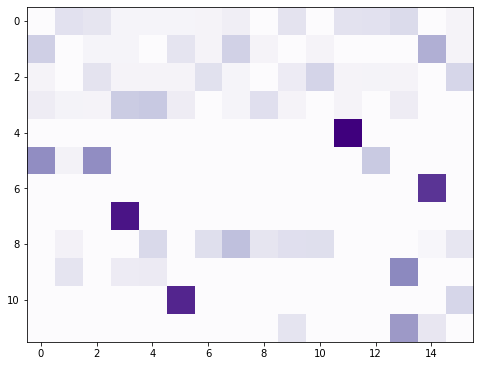

Non-zero values average: 0.390477
---------------------------------------
Number of communities in test400 graph: 63
Asynchronous Fluid (AB) Communities:
[[1, 6, 21, 38, 42, 43, 78, 93, 95, 108, 113], [2, 8, 121, 127, 267, 298, 303, 327], [3, 191], [4, 340], [5, 9, 45, 50, 69, 99], [7, 52, 107, 132, 174, 180, 208, 217, 271], [10, 19, 67, 79, 101, 141, 142, 163], [11, 86, 119, 194, 197], [12, 47, 48, 110, 160, 166, 201, 231], [13, 29, 75, 104, 111, 173, 190], [14, 26, 39, 89, 144, 148, 184, 189, 192, 224, 226, 228, 269, 270, 284], [15, 179, 188], [16, 36, 46, 55, 128, 154, 165, 185], [17, 60, 223, 229, 257, 322, 325, 348, 358, 359], [18, 71, 153, 157, 161, 183, 218], [20, 143, 227, 239, 279, 288], [22, 24, 28, 35, 44, 68, 88, 94, 105, 145], [23, 150, 244, 301, 335, 367], [25, 64, 98, 117, 135, 202, 273], [27, 30, 37, 54, 77, 81, 90, 103], [31, 83, 114, 225, 233, 234, 258, 264], [32, 122, 140, 152, 261], [33, 115, 167], [34, 390], [40, 53, 66, 125, 175, 186, 206, 207, 247, 309], [41, 57,

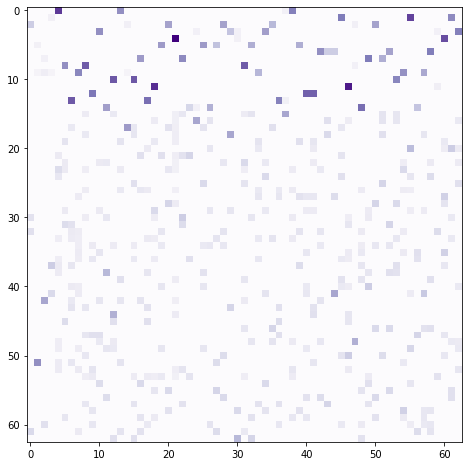

Non-zero values average: 0.206143
---------------------------------------
Number of communities in test1000 graph: 42
Asynchronous Fluid (AB) Communities:
[[1, 10, 88, 111, 117, 183, 208, 217, 239, 282, 308, 424, 439, 455, 517, 578, 621, 756, 764, 772, 842, 849, 902, 909, 991], [2, 24, 26, 64, 168, 198, 209, 263, 387, 395, 523, 526, 590, 757, 759, 773, 777, 778, 811, 871, 893, 982], [3, 66, 96, 106, 135, 246, 274, 356, 448, 461, 470, 516, 540, 545, 548, 567, 583, 624, 758, 768, 821, 827, 828, 892, 907, 994], [4, 14, 16, 32, 68, 94, 100, 101, 105, 218, 262, 264, 318, 320, 550, 579, 608, 723, 744, 750, 881, 961, 998], [5, 69, 93, 112, 181, 193, 195, 220, 224, 235, 309, 319, 346, 361, 373, 380, 440, 502, 512, 556, 648, 683, 779, 817, 862, 969, 976], [6, 54, 134, 194, 289, 358, 370, 376, 409, 435, 437, 450, 451, 480, 511, 553, 604, 651, 653, 682, 767, 781, 792, 854, 926, 997], [7, 8, 25, 74, 79, 157, 176, 227, 273, 302, 359, 372, 587, 610, 611, 689, 751, 775, 816, 923, 941], [9, 15, 20, 31

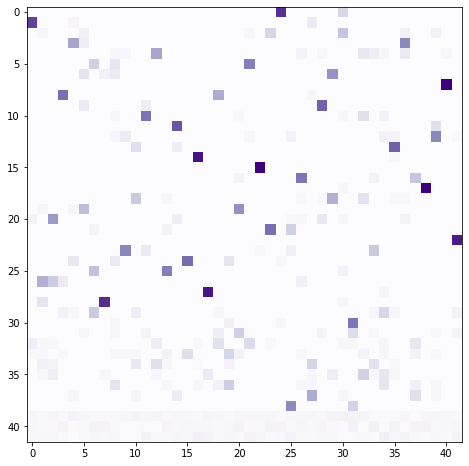

Non-zero values average: 0.296263
---------------------------------------


In [39]:
ratio_A_asynfluid_ab, avg_A_asynfluid_ab = [], []
for i in range(len(gs)):
    com_asynfluid_ab = get_comms(gs[i], "nasynfluidab")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_asynfluid_ab)))
    print("Asynchronous Fluid (AB) Communities:")
    print(sorted(com_asynfluid_ab))
    r_A_asynfluid_ab = seq_match(com_A[i], com_asynfluid_ab)
    print(r_A_asynfluid_b)
    ratio_A_asynfluid_ab.append(r_A_asynfluid_ab)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_asynfluid_ab, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_asynfluid_ab = nonzeroavg(r_A_asynfluid_ab)
    print("Non-zero values average: %f" % a_A_asynfluid_ab)
    avg_A_asynfluid_ab.append(a_A_asynfluid_ab)
    print(sprtr)

In [40]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_asynfluid_ab[i], 25, com_A[i], get_comms(gs[i], "nasynfluidab"), limiter)

graph: test75
Sequental matching ratio: 0.933333
Index: 5 - 10
[2, 5, 39, 53, 56, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.800000
Index: 6 - 6
[4, 27, 37, 44, 46]
[11, 27, 37, 44, 46]
----------------------
Sequental matching ratio: 0.625000
Index: 4 - 3
[9, 18, 22, 34, 35, 41, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.608696
Index: 3 - 5
[26, 29, 36, 38, 49, 58, 61, 69, 73]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.571429
Index: 9 - 2
[3, 7, 12, 13, 16, 31, 32, 33, 40, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.461538
Index: 8 - 4
[15, 20, 28, 45, 57, 60, 70, 75]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.424242
Index: 2 - 3
[9, 18, 22, 34, 35, 41, 67, 68]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28,

Number of communities in test75 graph: 5
K-Clique Communities (k=3):
[[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75], [3, 31, 40], [8, 62, 72], [24], [35, 54, 55]]
[[0.0, 0.37209302325581395, 0.21428571428571427, 0.07142857142857142, 0.21428571428571427], [0.0, 0.5348837209302325, 0.0, 0.07142857142857142, 0.0], [0.07692307692307693, 0.5116279069767442, 0.0, 0.07142857142857142, 0.0], [0.0, 0.37333333333333335, 0.0, 0.0, 0.0], [0.0, 0.2028985507246377, 0.0, 0.0, 0.0], [0.0, 0.2318840579710145, 0.0, 0.0, 0.0], [0.0, 0.12121212121212122, 0.0, 0.0, 0.0], [0.25, 0.11764705882352941, 0.0, 0.0, 0.4], [0.0, 0.35443037974683544, 0.19047619047619047, 0.0, 0.09523809523809523], [0.0, 0.2535211267605634, 0.15384615384615385, 0.0, 0.0], [0.0, 0.030303030303030304, 0.0, 0.75, 0.0]]


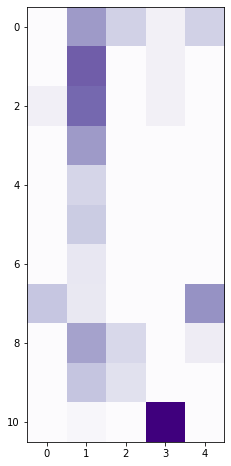

Non-zero values average: 0.318794
---------------------------------------
Number of communities in test100 graph: 2
K-Clique Communities (k=3):
[[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100], [8, 19, 22, 34, 41, 88, 97]]
[[0.35294117647058826, 0.30303030303030304], [0.4369747899159664, 0.0], [0.39316239316239315, 0.06451612903225806], [0.39316239316239315, 0.06451612903225806], [0.0, 0.8333333333333334], [0.3508771929824561, 0.07142857142857142], [0.10204081632653061, 0.0], [0.14, 0.0], [0.5970149253731343, 0.041666666666666664], [0.14, 0.0], [0.17647058823529413, 0.0], [0.10204081632653061, 0.0]]


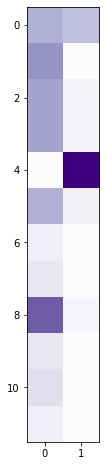

Non-zero values average: 0.334835
---------------------------------------
Number of communities in test400 graph: 4
K-Clique Communities (k=3):
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

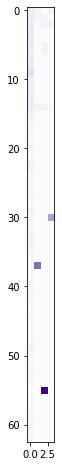

Non-zero values average: 0.087289
---------------------------------------
Number of communities in test1000 graph: 248
K-Clique Communities (k=3):
[[2, 24, 263, 590, 757], [3, 338, 661, 827], [4, 429, 790], [5, 319, 361, 380, 502, 779, 862, 969], [6, 376, 781], [7], [8, 98, 290, 839, 927, 935, 967], [10, 142, 238, 587, 879], [11, 245, 260, 353, 378], [12, 558, 743, 780], [13, 350, 391, 500, 641, 818, 883, 984], [16, 96, 101, 318, 961], [17, 606], [19, 226, 266, 372, 397, 466, 473, 513, 763, 822, 910, 979], [20, 22, 60, 322, 347, 539, 1000], [21], [26, 395, 773, 778], [27, 133, 270, 992], [31], [32, 94, 100], [34, 75, 530, 585, 644, 649, 853, 877], [35, 960], [36, 104, 138, 146, 349, 483, 484, 534, 638, 676, 694, 719, 829, 831, 886, 901, 918, 993], [39, 427, 863], [43, 315, 363], [44, 872], [45, 62, 953], [46, 402, 428, 626, 700, 843, 856, 937], [47, 161, 247, 386, 401, 416, 433, 444, 471, 491, 517, 555, 560, 594, 712, 798, 914, 916, 925], [48, 697], [50, 212, 283, 354, 419, 425, 426, 4

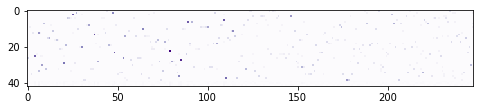

Non-zero values average: 0.284590
---------------------------------------


In [41]:
ratio_A_n_kcliq_3, avg_A_n_kcliq_3 = [], []
for i in range(len(gs)):
    com_kcliq_3 = get_comms(gs[i], "nkcliq3")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_kcliq_3)))
    print("K-Clique Communities (k=3):")
    print(sorted(com_kcliq_3))
    r_A_n_kcliq_3 = seq_match(com_A[i], com_kcliq_3)
    print(r_A_n_kcliq_3)
    ratio_A_n_kcliq_3.append(r_A_n_kcliq_3)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_n_kcliq_3, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_n_kcliq_3 = nonzeroavg(r_A_n_kcliq_3)
    print("Non-zero values average: %f" % a_A_n_kcliq_3)
    avg_A_n_kcliq_3.append(a_A_n_kcliq_3)
    print(sprtr)

In [42]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_n_kcliq_3[i], 25, com_A[i], get_comms(gs[i], "nkcliq3"), limiter)

graph: test75
Sequental matching ratio: 0.750000
Index: 10 - 3
[35, 54, 55]
[1, 21, 35, 54, 55]
----------------------
Sequental matching ratio: 0.534884
Index: 1 - 1
[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.511628
Index: 2 - 1
[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74]
----------------------
graph: test100
Sequental matching ratio: 0.833333
Index: 4 - 1


Number of communities in test75 graph: 7
K-Clique Communities (k=4):
[[2, 34, 51, 67, 68, 74], [7, 32, 72], [26, 30, 38, 48, 58, 61, 69, 73], [39, 53, 66], [42, 59], [43, 45, 50, 52, 62, 63, 64, 65, 70, 71], [47, 57, 60, 75]]
[[0.36363636363636365, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.05714285714285714, 0.0], [0.06060606060606061, 0.07142857142857142, 0.0, 0.14814814814814814, 0.0, 0.34285714285714286, 0.20689655172413793], [0.06060606060606061, 0.07142857142857142, 0.14285714285714285, 0.0, 0.3870967741935484, 0.17142857142857143, 0.06896551724137931], [0.7272727272727273, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0], [0.0, 0.0, 0.0, 0.4, 0.42857142857142855, 0.0, 0.0], [0.0, 0.5454545454545454, 0.0, 0.0, 0.14285714285714285, 0.1111111111111111, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.11764705882352941, 0.0], [0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.42857142857142855, 0.36363636363636365], [0.0, 0.0, 0.46153846153846156, 0.0, 0.0, 0.2, 0.0], [0.0, 0

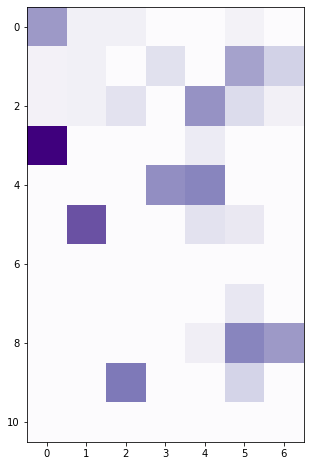

Non-zero values average: 0.284768
---------------------------------------
Number of communities in test100 graph: 5
K-Clique Communities (k=4):
[[1, 15, 16, 17, 20, 25, 27, 35, 36, 39, 44, 46, 47, 48, 49, 51, 53, 54, 55, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 99, 100], [8, 34, 41, 97], [9, 40, 95, 98], [21, 28, 50, 52, 60, 75, 81], [24, 45, 56, 70]]
[[0.1728395061728395, 0.13333333333333333, 0.26666666666666666, 0.0, 0.06060606060606061], [0.49382716049382713, 0.0, 0.0, 0.0, 0.18181818181818182], [0.3037974683544304, 0.07142857142857142, 0.0, 0.0, 0.06451612903225806], [0.4050632911392405, 0.07142857142857142, 0.0, 0.2857142857142857, 0.12903225806451613], [0.0, 0.0, 0.6666666666666666, 0.0, 0.0], [0.42105263157894735, 0.0, 0.0, 0.08, 0.0], [0.16666666666666666, 0.0, 0.0, 0.0, 0.0], [0.1935483870967742, 0.0, 0.0, 0.0, 0.0], [0.5833333333333334, 0.0, 0.044444444444444446, 0.04444444444444444

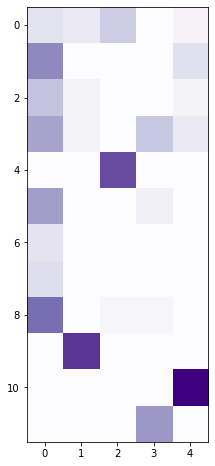

Non-zero values average: 0.440014
---------------------------------------
Number of communities in test400 graph: 27
K-Clique Communities (k=4):
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 243, 245, 248, 281, 289, 290, 298, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 219, 241, 262, 263, 283, 318, 328, 338, 340, 341, 353, 366], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [7, 12, 13, 29, 47, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 180, 201, 208, 217, 231, 271, 275], [10, 16, 36, 41, 46, 57, 63, 67, 70, 79, 101, 128, 130, 141, 142, 154, 156, 163, 165, 185, 195], [11, 33, 61, 72, 86, 87, 96, 102, 115, 118, 119, 136, 167, 171, 178, 181, 193, 194, 197, 198, 203, 206, 247, 320, 336, 347, 351, 361, 368, 372, 374, 376, 382, 386, 387, 389, 390, 391, 392, 393, 394, 396, 397, 399, 400], [14, 26, 39, 40, 53, 66, 89, 125, 144, 148,

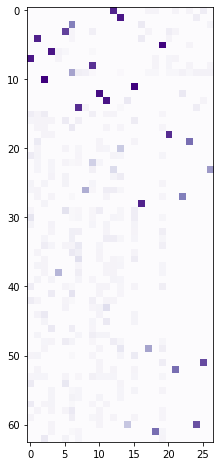

Non-zero values average: 0.253261
---------------------------------------
Number of communities in test1000 graph: 22
K-Clique Communities (k=4):
[[21, 379, 527, 685, 852], [50, 797, 915, 990], [79, 227, 751, 941], [86, 608, 707, 807], [88, 689, 698, 951], [111, 424, 772, 849], [127, 793, 832, 887], [280, 733, 865, 919], [407, 600, 635, 705], [438, 622, 667, 874], [455, 621, 902, 991], [458, 485, 571, 754, 942], [463, 489, 724, 791], [483, 638, 719, 993], [523, 526, 893, 982], [561, 928, 936, 965], [568, 917, 973, 989], [582, 674, 911, 922, 948, 987], [636, 760, 814, 850], [644, 649, 853, 877], [737, 964], [808, 812, 847, 985]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0,

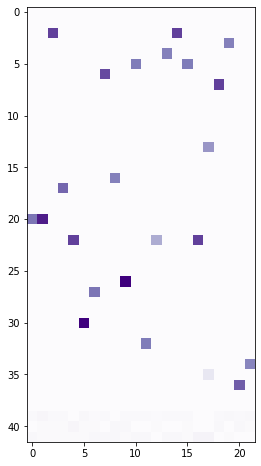

Non-zero values average: 0.205592
---------------------------------------


In [76]:
ratio_A_n_kcliq_4, avg_A_n_kcliq_4 = [], []
for i in range(len(gs)):
    com_kcliq_4 = get_comms(gs[i], "nkcliq4")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_kcliq_4)))
    print("K-Clique Communities (k=4):")
    print(sorted(com_kcliq_4))
    r_A_n_kcliq_4 = seq_match(com_A[i], com_kcliq_4)
    print(r_A_n_kcliq_4)
    ratio_A_n_kcliq_4.append(r_A_n_kcliq_4)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_n_kcliq_4, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_n_kcliq_4 = nonzeroavg(r_A_n_kcliq_4)
    print("Non-zero values average: %f" % a_A_n_kcliq_4)
    avg_A_n_kcliq_4.append(a_A_n_kcliq_4)
    print(sprtr)

In [75]:
limiter = 0.2
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_n_kcliq_4[i], 25, com_A[i], get_comms(gs[i], "nkcliq4"), limiter)

graph: test75
Sequental matching ratio: 0.727273
Index: 3 - 0
[26, 30, 38, 48, 58, 61, 69, 73]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.545455
Index: 5 - 1
[39, 53, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.461538
Index: 9 - 2
[7, 32, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.428571
Index: 4 - 4
[2, 34, 51, 67, 68, 74]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.428571
Index: 8 - 5
[43, 45, 50, 52, 62, 63, 64, 65, 70, 71]
[3, 8, 13, 15, 16, 17, 20, 43, 47, 51, 52, 57, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.400000
Index: 4 - 3
[42, 59]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.387097
Index: 2 - 4
[2, 34, 51, 67, 68, 74]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 7

Number of communities in test75 graph: 1
Fast-Greedy Communities:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]]
[[0.5], [0.5], [0.5], [0.3146067415730337], [0.1927710843373494], [0.1927710843373494], [0.125], [0.17073170731707318], [0.3870967741935484], [0.23529411764705882], [0.125]]


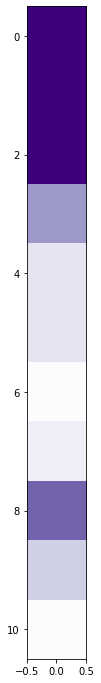

Non-zero values average: 0.294843
---------------------------------------
Number of communities in test100 graph: 1
Fast-Greedy Communities:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]]
[[0.4126984126984127], [0.4126984126984127], [0.3870967741935484], [0.3870967741935484], [0.09523809523809523], [0.34710743801652894], [0.09523809523809523], [0.1308411214953271], [0.5815602836879432], [0.1308411214953271], [0.1651376146788991], [0.09523809523809523]]


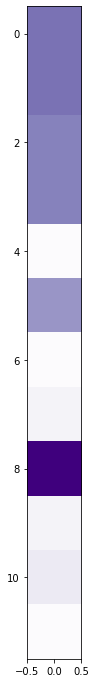

Non-zero values average: 0.270066
---------------------------------------
Number of communities in test400 graph: 6
Fast-Greedy Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [2, 3, 7, 8, 12, 13, 14, 17, 20, 23, 25, 26, 29, 31, 32, 34, 39, 40, 47, 48, 49, 51, 52, 53, 56, 60, 62, 64, 66, 75, 82, 83, 84, 85, 89, 92, 98, 100, 104, 106, 107, 109, 110, 111, 114, 116, 117, 120, 121, 122, 123, 124, 125, 127, 131, 132, 134, 135, 137, 139, 140, 143, 144, 146, 147, 148, 149, 150, 152, 155, 158, 159, 160, 166, 168, 173, 174, 175, 180, 182, 184, 186, 187, 189, 190, 191, 192, 196, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 27

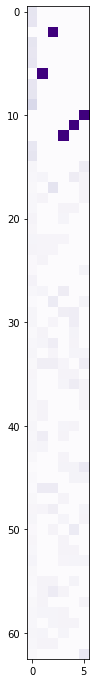

Non-zero values average: 0.109723
---------------------------------------
Number of communities in test1000 graph: 1
Fast-Greedy Communities:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,

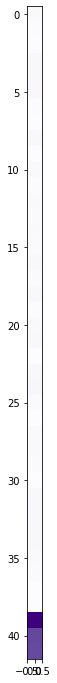

Non-zero values average: 0.081958
---------------------------------------


In [45]:
ratio_A_fastgreedy, avg_A_fastgreedy = [], []
for i in range(len(gs)):
    com_fastgreedy = get_comms(gs[i], "nfastgreedy")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_fastgreedy)))
    print("Fast-Greedy Communities:")
    print(sorted(com_fastgreedy))
    r_A_fastgreedy = seq_match(com_A[i], com_fastgreedy)
    print(r_A_fastgreedy)
    ratio_A_fastgreedy.append(r_A_fastgreedy)
    plt.figure(figsize=(12,12))
    plt.imshow(r_A_fastgreedy, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_fastgreedy = nonzeroavg(r_A_fastgreedy)
    print("Non-zero values average: %f" % a_A_fastgreedy)
    avg_A_fastgreedy.append(a_A_fastgreedy)
    print(sprtr)

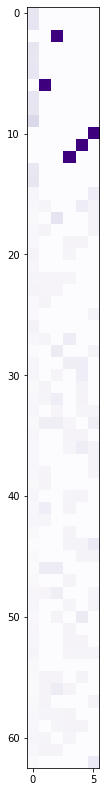

In [46]:
plt.figure(figsize=(20,14))
plt.imshow(ratio_A_fastgreedy[2], cmap=plt.cm.Purples, interpolation='nearest')
plt.show()

In [47]:
limiter = 0.3
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_fastgreedy[i], 25, com_A[i], get_comms(gs[i], "nfastgreedy"), limiter)

graph: test75
Sequental matching ratio: 0.500000
Index: 0 - 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[3, 4, 5, 6, 8, 12, 13, 17, 20, 26, 27, 29, 30, 31, 35, 36, 39, 40, 48, 49, 58, 62, 69, 72, 73]
----------------------
Sequental matching ratio: 0.500000
Index: 1 - 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.500000
Index: 2 - 0
[1, 2, 3, 4, 5, 

In [48]:
print(get_comm(g400, "nfastgreedy", 0))

[2, 3, 7, 8, 12, 13, 14, 17, 20, 23, 25, 26, 29, 31, 32, 34, 39, 40, 47, 48, 49, 51, 52, 53, 56, 60, 62, 64, 66, 75, 82, 83, 84, 85, 89, 92, 98, 100, 104, 106, 107, 109, 110, 111, 114, 116, 117, 120, 121, 122, 123, 124, 125, 127, 131, 132, 134, 135, 137, 139, 140, 143, 144, 146, 147, 148, 149, 150, 152, 155, 158, 159, 160, 166, 168, 173, 174, 175, 180, 182, 184, 186, 187, 189, 190, 191, 192, 196, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 

Number of communities in test75 graph: 2
Labelprop (Nx) Communities:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 48, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74], [11, 15, 16, 19, 20, 37, 42, 44, 45, 46, 47, 50, 52, 57, 70, 71, 75]]
[[0.5783132530120482, 0.047619047619047616], [0.21686746987951808, 0.7619047619047619], [0.6024096385542169, 0.0], [0.3888888888888889, 0.0], [0.21212121212121213, 0.08], [0.21212121212121213, 0.08], [0.031746031746031744, 0.36363636363636365], [0.18461538461538463, 0.08333333333333333], [0.2631578947368421, 0.45714285714285713], [0.23529411764705882, 0.14814814814814814], [0.15873015873015872, 0.0]]


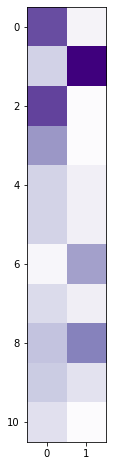

Non-zero values average: 0.333354
---------------------------------------
Number of communities in test100 graph: 1
Labelprop (Nx) Communities:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]]
[[0.4126984126984127], [0.4126984126984127], [0.3870967741935484], [0.3870967741935484], [0.09523809523809523], [0.34710743801652894], [0.09523809523809523], [0.1308411214953271], [0.5815602836879432], [0.1308411214953271], [0.1651376146788991], [0.09523809523809523]]


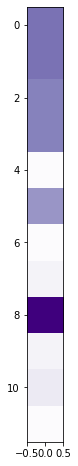

Non-zero values average: 0.270066
---------------------------------------
Number of communities in test400 graph: 11
Labelprop (Nx) Communities:
[[1, 4, 6, 7, 12, 13, 14, 15, 18, 21, 22, 24, 26, 28, 29, 35, 38, 39, 40, 42, 43, 44, 47, 48, 52, 53, 59, 66, 68, 71, 73, 75, 78, 88, 89, 91, 93, 94, 95, 104, 105, 107, 108, 110, 111, 112, 113, 125, 126, 129, 132, 138, 144, 145, 148, 151, 153, 157, 160, 161, 166, 169, 172, 173, 174, 175, 176, 177, 179, 180, 183, 184, 186, 188, 189, 190, 191, 192, 201, 206, 207, 208, 211, 217, 218, 219, 224, 226, 228, 231, 247, 269, 270, 271, 275, 284, 309, 346, 347, 351, 352, 355, 357, 361, 362, 363, 365, 368, 369, 371, 372, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311

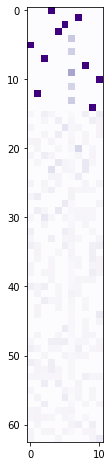

Non-zero values average: 0.185711
---------------------------------------
Number of communities in test1000 graph: 9
Labelprop (Nx) Communities:
[[1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58, 62, 63, 64, 65, 66, 69, 70, 72, 74, 75, 76, 77, 78, 79, 80, 82, 83, 86, 87, 88, 89, 90, 92, 93, 94, 96, 98, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 117, 120, 121, 123, 124, 127, 128, 129, 130, 131, 133, 135, 136, 137, 138, 140, 141, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 160, 161, 162, 164, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 196, 198, 199, 200, 201, 205, 209, 210, 211, 213, 214, 216, 217, 221, 222, 223, 224, 225, 226, 227, 228, 230, 232, 233, 234, 236, 237, 239, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 260, 262, 

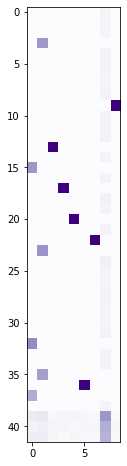

Non-zero values average: 0.271340
---------------------------------------


In [49]:
ratio_A_n_labelprop, avg_A_n_labelprop = [], []
for i in range(len(gs)):
    com_n_labelprop = get_comms(gs[i], "nlabelprop")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_n_labelprop)))
    print("Labelprop (Nx) Communities:")
    print(sorted(com_n_labelprop))
    r_A_n_labelprop = seq_match(com_A[i], com_n_labelprop)
    print(r_A_n_labelprop)
    ratio_A_n_labelprop.append(r_A_n_labelprop)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_n_labelprop, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_n_labelprop = nonzeroavg(r_A_n_labelprop)
    print("Non-zero values average: %f" % a_A_n_labelprop)
    avg_A_n_labelprop.append(a_A_n_labelprop)
    print(sprtr)

In [50]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_n_labelprop[i], 25, com_A[i], get_comms(gs[i], "nlabelprop"), limiter)

graph: test75
Sequental matching ratio: 0.761905
Index: 1 - 1
[11, 15, 16, 19, 20, 37, 42, 44, 45, 46, 47, 50, 52, 57, 70, 71, 75]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.602410
Index: 2 - 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 48, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74]
----------------------
Sequental matching ratio: 0.578313
Index: 0 - 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 48, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74]
[3, 4, 5, 6, 8, 12, 13, 17, 20, 26, 27, 29, 30, 31, 35, 36, 39, 40, 48, 49, 58, 6

Number of communities in test75 graph: 5
Clique Percolation Communities (k=3):
[[2, 24, 263, 590, 757], [3, 338, 661, 827], [4, 429, 790], [5, 319, 361, 380, 502, 779, 862, 969], [6, 376, 781], [7], [8, 98, 290, 839, 927, 935, 967], [10, 142, 238, 587, 879], [11, 245, 260, 353, 378], [12, 558, 743, 780], [13, 350, 391, 500, 641, 818, 883, 984], [16, 96, 101, 318, 961], [17, 606], [19, 226, 266, 372, 397, 466, 473, 513, 763, 822, 910, 979], [20, 22, 60, 322, 347, 539, 1000], [21], [26, 395, 773, 778], [27, 133, 270, 992], [31], [32, 94, 100], [34, 75, 530, 585, 644, 649, 853, 877], [35, 960], [36, 104, 138, 146, 349, 483, 484, 534, 638, 676, 694, 719, 829, 831, 886, 901, 918, 993], [39, 427, 863], [43, 315, 363], [44, 872], [45, 62, 953], [46, 402, 428, 626, 700, 843, 856, 937], [47, 161, 247, 386, 401, 416, 433, 444, 471, 491, 517, 555, 560, 594, 712, 798, 914, 916, 925], [48, 697], [50, 212, 283, 354, 419, 425, 426, 465, 561, 639, 737, 788, 789, 797, 810, 915, 936, 964, 965, 990], [51

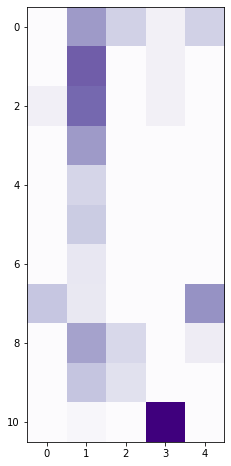

Non-zero values average: 0.318794
---------------------------------------
Number of communities in test100 graph: 2
Clique Percolation Communities (k=3):
[[2, 24, 263, 590, 757], [3, 338, 661, 827], [4, 429, 790], [5, 319, 361, 380, 502, 779, 862, 969], [6, 376, 781], [7], [8, 98, 290, 839, 927, 935, 967], [10, 142, 238, 587, 879], [11, 245, 260, 353, 378], [12, 558, 743, 780], [13, 350, 391, 500, 641, 818, 883, 984], [16, 96, 101, 318, 961], [17, 606], [19, 226, 266, 372, 397, 466, 473, 513, 763, 822, 910, 979], [20, 22, 60, 322, 347, 539, 1000], [21], [26, 395, 773, 778], [27, 133, 270, 992], [31], [32, 94, 100], [34, 75, 530, 585, 644, 649, 853, 877], [35, 960], [36, 104, 138, 146, 349, 483, 484, 534, 638, 676, 694, 719, 829, 831, 886, 901, 918, 993], [39, 427, 863], [43, 315, 363], [44, 872], [45, 62, 953], [46, 402, 428, 626, 700, 843, 856, 937], [47, 161, 247, 386, 401, 416, 433, 444, 471, 491, 517, 555, 560, 594, 712, 798, 914, 916, 925], [48, 697], [50, 212, 283, 354, 419, 425,

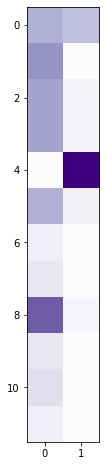

Non-zero values average: 0.334835
---------------------------------------
Number of communities in test400 graph: 4
Clique Percolation Communities (k=3):
[[2, 24, 263, 590, 757], [3, 338, 661, 827], [4, 429, 790], [5, 319, 361, 380, 502, 779, 862, 969], [6, 376, 781], [7], [8, 98, 290, 839, 927, 935, 967], [10, 142, 238, 587, 879], [11, 245, 260, 353, 378], [12, 558, 743, 780], [13, 350, 391, 500, 641, 818, 883, 984], [16, 96, 101, 318, 961], [17, 606], [19, 226, 266, 372, 397, 466, 473, 513, 763, 822, 910, 979], [20, 22, 60, 322, 347, 539, 1000], [21], [26, 395, 773, 778], [27, 133, 270, 992], [31], [32, 94, 100], [34, 75, 530, 585, 644, 649, 853, 877], [35, 960], [36, 104, 138, 146, 349, 483, 484, 534, 638, 676, 694, 719, 829, 831, 886, 901, 918, 993], [39, 427, 863], [43, 315, 363], [44, 872], [45, 62, 953], [46, 402, 428, 626, 700, 843, 856, 937], [47, 161, 247, 386, 401, 416, 433, 444, 471, 491, 517, 555, 560, 594, 712, 798, 914, 916, 925], [48, 697], [50, 212, 283, 354, 419, 425,

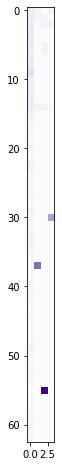

Non-zero values average: 0.087289
---------------------------------------
Number of communities in test1000 graph: 248
Clique Percolation Communities (k=3):
[[2, 24, 263, 590, 757], [3, 338, 661, 827], [4, 429, 790], [5, 319, 361, 380, 502, 779, 862, 969], [6, 376, 781], [7], [8, 98, 290, 839, 927, 935, 967], [10, 142, 238, 587, 879], [11, 245, 260, 353, 378], [12, 558, 743, 780], [13, 350, 391, 500, 641, 818, 883, 984], [16, 96, 101, 318, 961], [17, 606], [19, 226, 266, 372, 397, 466, 473, 513, 763, 822, 910, 979], [20, 22, 60, 322, 347, 539, 1000], [21], [26, 395, 773, 778], [27, 133, 270, 992], [31], [32, 94, 100], [34, 75, 530, 585, 644, 649, 853, 877], [35, 960], [36, 104, 138, 146, 349, 483, 484, 534, 638, 676, 694, 719, 829, 831, 886, 901, 918, 993], [39, 427, 863], [43, 315, 363], [44, 872], [45, 62, 953], [46, 402, 428, 626, 700, 843, 856, 937], [47, 161, 247, 386, 401, 416, 433, 444, 471, 491, 517, 555, 560, 594, 712, 798, 914, 916, 925], [48, 697], [50, 212, 283, 354, 419, 4

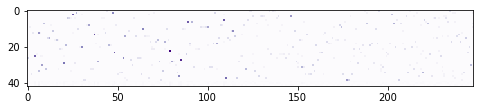

Non-zero values average: 0.284590
---------------------------------------


In [51]:
ratio_A_perccliq_3, avg_A_perccliq_3 = [], []
for i in range(len(gs)):
    com_perccliq_3 = get_comms(gs[i], "aperccliq3")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_perccliq_3)))
    print("Clique Percolation Communities (k=3):")
    print(sorted(com_kcliq_3))
    r_A_perccliq_3 = seq_match(com_A[i], com_perccliq_3)
    print(r_A_perccliq_3)
    ratio_A_perccliq_3.append(r_A_perccliq_3)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_perccliq_3, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_perccliq_3 = nonzeroavg(r_A_perccliq_3)
    print("Non-zero values average: %f" % a_A_perccliq_3)
    avg_A_perccliq_3.append(a_A_perccliq_3)
    print(sprtr)

In [52]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_perccliq_3[i], 25, com_A[i], get_comms(gs[i], "aperccliq3"), limiter)

graph: test75
Sequental matching ratio: 0.750000
Index: 10 - 3
[35, 54, 55]
[1, 21, 35, 54, 55]
----------------------
Sequental matching ratio: 0.534884
Index: 1 - 1
[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.511628
Index: 2 - 1
[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74]
----------------------
graph: test100
Sequental matching ratio: 0.833333
Index: 4 - 1


Number of communities in test75 graph: 7
Clique Percolation Communities (k=4):
[[21, 379, 527, 685, 852], [50, 797, 915, 990], [79, 227, 751, 941], [86, 608, 707, 807], [88, 689, 698, 951], [111, 424, 772, 849], [127, 793, 832, 887], [280, 733, 865, 919], [407, 600, 635, 705], [438, 622, 667, 874], [455, 621, 902, 991], [458, 485, 571, 754, 942], [463, 489, 724, 791], [483, 638, 719, 993], [523, 526, 893, 982], [561, 928, 936, 965], [568, 917, 973, 989], [582, 674, 911, 922, 948, 987], [636, 760, 814, 850], [644, 649, 853, 877], [737, 964], [808, 812, 847, 985]]
[[0.36363636363636365, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.05714285714285714, 0.0], [0.06060606060606061, 0.07142857142857142, 0.0, 0.14814814814814814, 0.0, 0.34285714285714286, 0.20689655172413793], [0.06060606060606061, 0.07142857142857142, 0.14285714285714285, 0.0, 0.3870967741935484, 0.17142857142857143, 0.06896551724137931], [0.7272727272727273, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0], [0.0, 0.0, 0.0, 0.4, 0.42857

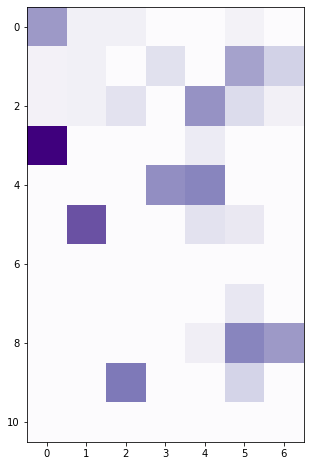

Non-zero values average: 0.284768
---------------------------------------
Number of communities in test100 graph: 5
Clique Percolation Communities (k=4):
[[21, 379, 527, 685, 852], [50, 797, 915, 990], [79, 227, 751, 941], [86, 608, 707, 807], [88, 689, 698, 951], [111, 424, 772, 849], [127, 793, 832, 887], [280, 733, 865, 919], [407, 600, 635, 705], [438, 622, 667, 874], [455, 621, 902, 991], [458, 485, 571, 754, 942], [463, 489, 724, 791], [483, 638, 719, 993], [523, 526, 893, 982], [561, 928, 936, 965], [568, 917, 973, 989], [582, 674, 911, 922, 948, 987], [636, 760, 814, 850], [644, 649, 853, 877], [737, 964], [808, 812, 847, 985]]
[[0.1728395061728395, 0.13333333333333333, 0.26666666666666666, 0.0, 0.06060606060606061], [0.49382716049382713, 0.0, 0.0, 0.0, 0.18181818181818182], [0.3037974683544304, 0.07142857142857142, 0.0, 0.0, 0.06451612903225806], [0.4050632911392405, 0.07142857142857142, 0.0, 0.2857142857142857, 0.12903225806451613], [0.0, 0.0, 0.6666666666666666, 0.0, 0.0], [

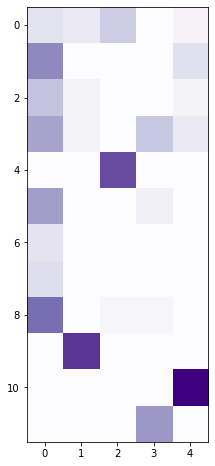

Non-zero values average: 0.440014
---------------------------------------
Number of communities in test400 graph: 27
Clique Percolation Communities (k=4):
[[21, 379, 527, 685, 852], [50, 797, 915, 990], [79, 227, 751, 941], [86, 608, 707, 807], [88, 689, 698, 951], [111, 424, 772, 849], [127, 793, 832, 887], [280, 733, 865, 919], [407, 600, 635, 705], [438, 622, 667, 874], [455, 621, 902, 991], [458, 485, 571, 754, 942], [463, 489, 724, 791], [483, 638, 719, 993], [523, 526, 893, 982], [561, 928, 936, 965], [568, 917, 973, 989], [582, 674, 911, 922, 948, 987], [636, 760, 814, 850], [644, 649, 853, 877], [737, 964], [808, 812, 847, 985]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.88, 0.0, 0.0, 0.0, 0.0, 0.06451612903225806, 0.0625, 0.0, 0.0, 0.0625, 0.0, 0.0625, 0.0, 0.12121212121212122, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9259259259259259, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12121212121212122, 0.0, 0.0], [0.0, 0

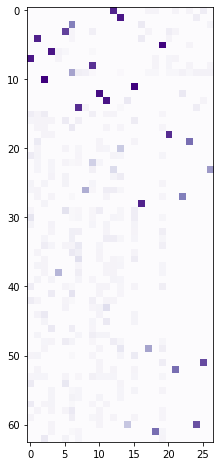

Non-zero values average: 0.253261
---------------------------------------
Number of communities in test1000 graph: 22
Clique Percolation Communities (k=4):
[[21, 379, 527, 685, 852], [50, 797, 915, 990], [79, 227, 751, 941], [86, 608, 707, 807], [88, 689, 698, 951], [111, 424, 772, 849], [127, 793, 832, 887], [280, 733, 865, 919], [407, 600, 635, 705], [438, 622, 667, 874], [455, 621, 902, 991], [458, 485, 571, 754, 942], [463, 489, 724, 791], [483, 638, 719, 993], [523, 526, 893, 982], [561, 928, 936, 965], [568, 917, 973, 989], [582, 674, 911, 922, 948, 987], [636, 760, 814, 850], [644, 649, 853, 877], [737, 964], [808, 812, 847, 985]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0,

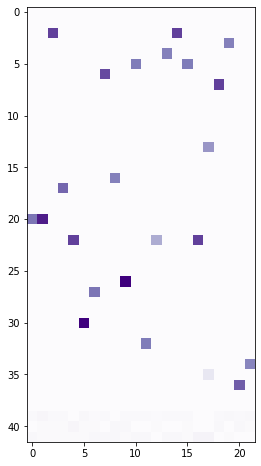

Non-zero values average: 0.205592
---------------------------------------


In [53]:
ratio_A_perccliq_4, avg_A_perccliq_4 = [], []
for i in range(len(gs)):
    com_perccliq_4 = get_comms(gs[i], "aperccliq4")
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_perccliq_4)))
    print("Clique Percolation Communities (k=4):")
    print(sorted(com_kcliq_4))
    r_A_perccliq_4 = seq_match(com_A[i], com_perccliq_4)
    print(r_A_perccliq_4)
    ratio_A_perccliq_4.append(r_A_perccliq_4)
    plt.figure(figsize=(8,8))
    plt.imshow(r_A_perccliq_4, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_perccliq_4 = nonzeroavg(r_A_perccliq_4)
    print("Non-zero values average: %f" % a_A_perccliq_4)
    avg_A_perccliq_4.append(a_A_perccliq_4)
    print(sprtr)

In [54]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_perccliq_3[i], 25, com_A[i], get_comms(gs[i], "aperccliq3"), limiter)

graph: test75
Sequental matching ratio: 0.750000
Index: 10 - 3
[35, 54, 55]
[1, 21, 35, 54, 55]
----------------------
Sequental matching ratio: 0.534884
Index: 1 - 1
[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75]
[1, 10, 11, 15, 16, 19, 23, 37, 42, 43, 44, 45, 46, 47, 50, 52, 55, 56, 57, 59, 61, 66, 70, 71, 75]
----------------------
Sequental matching ratio: 0.511628
Index: 2 - 1
[1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75]
[2, 7, 9, 14, 18, 21, 22, 24, 25, 28, 32, 33, 34, 38, 41, 51, 53, 54, 60, 63, 64, 65, 67, 68, 74]
----------------------
graph: test100
Sequental matching ratio: 0.833333
Index: 4 - 1


In [55]:
for i in range(len(gs)):
    ##Comparison of Labelprop for igraph and networkx
    com_labelprop = get_comms(gs[i], "comm_labelprop")
    print("Number of communities: %s" % len(com_labelprop))
    print("Igraph Labelprop Communities:")
    print(com_labelprop)
    com_n_labelprop = get_comms(gs[i], "nlabelprop")
    print("Number of communities: %s" % len(com_n_labelprop))
    print("Networkx Labelprop Communities:")
    print(com_n_labelprop)
    print(sprtr)

Number of communities: 5
Igraph Labelprop Communities:
[[1, 6, 8, 15, 16, 17, 20, 21, 24, 28, 37, 43, 45, 46, 47, 50, 51, 52, 55, 57, 59, 60, 62, 63, 64, 70, 75], [2, 19, 39, 53, 56, 65, 66], [3, 4, 7, 11, 12, 13, 25, 31, 32, 33, 40, 44, 49, 71, 72], [5, 9, 10, 14, 23, 26, 27, 29, 30, 35, 36, 38, 48, 54, 58, 61, 69, 73, 74], [18, 22, 34, 41, 42, 67, 68]]
Number of communities: 2
Networkx Labelprop Communities:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 48, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74], [11, 15, 16, 19, 20, 37, 42, 44, 45, 46, 47, 50, 52, 57, 70, 71, 75]]
---------------------------------------
Number of communities: 5
Igraph Labelprop Communities:
[[1, 12, 25, 27, 39, 42, 44, 46, 62, 63, 78, 80, 84, 86, 92, 99, 100], [2, 3, 4, 5, 7, 11, 14, 15, 16, 17, 18, 20, 21, 23, 28, 30, 31, 33, 35, 37, 38, 47, 48, 49, 50, 52, 54, 55, 57, 58, 59, 60, 

[[0.35294117647058826, 0.5454545454545454], [0.18461538461538463, 0.08333333333333333], [0.3287671232876712, 0.1875], [0.4935064935064935, 0.0], [0.18461538461538463, 0.08333333333333333]]


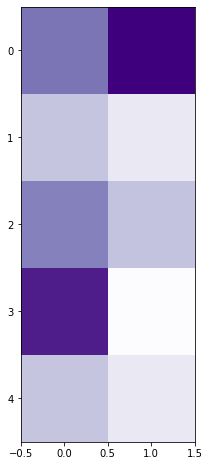

Non-zero values average: 0.348317
[[0.2905982905982906], [0.7421383647798742], [0.21428571428571427], [0.09523809523809523], [0.1308411214953271]]


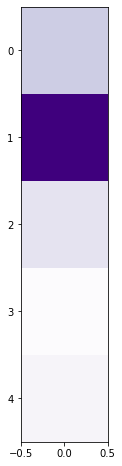

Non-zero values average: 0.294620
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.275, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.691358024691358, 0.0, 0.0, 0.2617801047120419, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3170731707317073, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2962962962962963, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4581005586592179, 0.0, 0.0, 0.0, 0.0]]


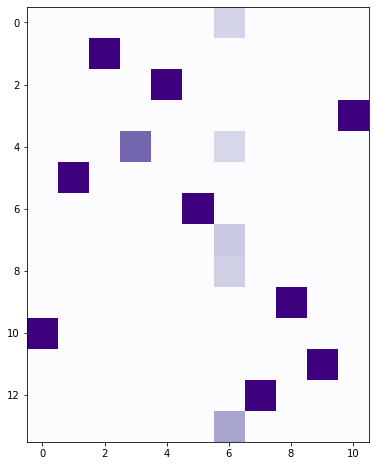

Non-zero values average: 0.788416
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07977991746905089, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1679790026246719, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08241758241758242, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.031029619181946404, 0.0], [0.21951219512195122, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06915629322268327, 0.0], [0.0, 0.015267175572519083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11843876177658143, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07977991746905089, 0.0], [0.7933884297520661, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.024096385542168676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025423728813559324, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02824858757062147, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0664819944598338, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017045454545454544, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.

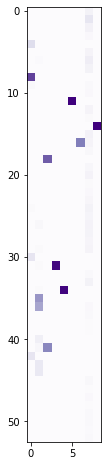

Non-zero values average: 0.174345


In [56]:
ratio_labelprops = []
for i in range(len(gs)):
    r = seq_match(get_comms(gs[i], "comm_labelprop"), get_comms(gs[i], "nlabelprop"))
    print(r)
    plt.figure(figsize=(8,8))
    plt.imshow(r, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    avg_labelprops = nonzeroavg(r)
    print("Non-zero values average: %f" % avg_labelprops)
    ratio_labelprops.append(r)

In [57]:
limiter = 0.4
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_labelprops[i], 25, get_comms(gs[i], "comm_labelprop"), get_comms(gs[i], "nlabelprop"), limiter)

graph: test75
Sequental matching ratio: 0.545455
Index: 0 - 1
[11, 15, 16, 19, 20, 37, 42, 44, 45, 46, 47, 50, 52, 57, 70, 71, 75]
[1, 6, 8, 15, 16, 17, 20, 21, 24, 28, 37, 43, 45, 46, 47, 50, 51, 52, 55, 57, 59, 60, 62, 63, 64, 70, 75]
----------------------
Sequental matching ratio: 0.493506
Index: 3 - 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 48, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74]
[5, 9, 10, 14, 23, 26, 27, 29, 30, 35, 36, 38, 48, 54, 58, 61, 69, 73, 74]
----------------------
graph: test100
Sequental matching ratio: 0.742138
Index: 1 - 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,

In [58]:
print(gs[3].vs[8])

igraph.Vertex(<igraph.Graph object at 0x7fdb3a9255e8>, 8, {'name': '9', 'Cluster_ID_A': 32.0, 'Cluster_ID_B': 1.0, 'comm_greedy': 5.0, 'comm_infomap': 11.0, 'comm_labelprop': 8.0, 'comm_louvain': 24.0, 'comm_spinglass': 23.0, 'comm_walktrap': 7.0, 'id': 'n8', 'nkcliq3': nan, 'nkcliq4': nan, 'nfastgreedy': 1, 'nlabelprop': 8, 'nasynfluida': 15, 'nasynfluidb': 3, 'nasynfluidab': 6, 'aperccliq3': nan, 'aperccliq4': nan})


In [59]:
attrs = ["comm_greedy", "comm_infomap"]
for i in range(len(gs)):
    labels = list(f.index for f in gs[i].vs)
    for j in range(len(attrs)):
        print("%s communities:" % attrs[j])
        n = ig.VertexClustering.FromAttribute(graph=gs[i],attribute=attrs[j])
        ig.plot(n, mark_groups=True, bbox=(1200,1200), vertex_label=labels)
        print(sprtr)

comm_greedy communities:
---------------------------------------
comm_infomap communities:
---------------------------------------
comm_greedy communities:
---------------------------------------
comm_infomap communities:
---------------------------------------
comm_greedy communities:
---------------------------------------
comm_infomap communities:
---------------------------------------
comm_greedy communities:
---------------------------------------
comm_infomap communities:
---------------------------------------


In [168]:
fs = ["t75_l.txt", "t100_l.txt", "t400_l.txt", "t1000_l.txt"]
comms = []
for i in range(len(gs)):
    lines = [line.rstrip('\n') for line in open(fs[i])]
    ll, l_ = [], []
    for l in lines:
        l = str(l[:-1])
        l = str(l[1:])
        l_ = str.split(l)
        for j in l_:
            j = int(j)
        ll.append(l_)
    comms.append(ll)
a = []
for i in range(len(comms)):
    b = []
    for j in range(len(comms[i])):
        c = []
        for z in range(len(comms[i][j])):
            c.append(int(comms[i][j][z]))
        b.append(c)
        c = []
    a.append(b)
    b = []
    
comms = a
#comms = convertStringList(comms)

In [169]:
print(comms[0][0])

[3, 31, 40]


Number of communities in test75 graph: 45
Link Communities:
[[1, 43, 55, 59], [2, 39, 41, 53, 65, 66], [2, 60, 64, 65, 67], [3, 31, 40], [4, 29, 36, 40, 49, 69], [4, 40, 49, 72], [7, 13, 20, 22, 25, 32, 33, 50, 71, 72], [7, 22, 32, 33, 71], [8, 15, 62, 64], [9, 14, 29, 73, 74], [9, 38, 53, 63, 64, 65], [10, 35, 54, 55], [15, 47, 57, 60], [16, 52, 71, 75], [18, 34, 68], [20, 50, 70, 75], [22, 33, 67, 68], [23, 53, 56, 61], [24, 45, 49], [25, 26, 30, 32, 48, 58, 74], [26, 30, 48, 58, 69, 73, 74], [26, 58, 69, 72, 74], [27, 39, 62, 73], [28, 31, 36, 40], [28, 41, 60], [30, 48, 58, 69], [34, 51, 53, 54, 64, 65, 67, 74], [34, 64, 67, 68], [37, 44, 46], [37, 46, 50, 56, 61, 66, 71], [37, 46, 75, 70], [38, 69, 73, 74], [39, 53, 65], [42, 44, 71], [42, 59, 67, 68], [42, 60, 67, 75], [43, 64, 70, 75], [45, 47, 57, 75], [45, 50, 56, 57, 70, 71, 75], [45, 57, 70, 75], [47, 51, 52, 64, 65, 75], [52, 57, 62, 70, 75], [58, 61, 69, 73, 74], [62, 63, 70, 75], [64, 65, 70, 75]]
[[0.21, 0.14, 0.2, 0.07,

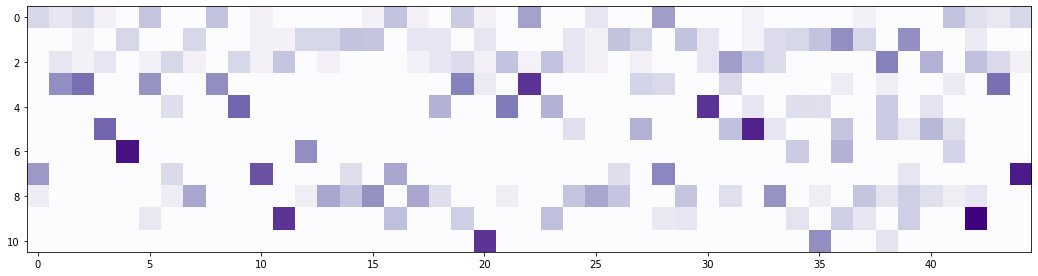

Non-zero values average: 0.418824
---------------------------------------
Number of communities in test100 graph: 52
Link Communities:
[[1, 2, 15, 17, 25, 27, 28, 44, 46, 50, 52, 54, 59, 62, 63, 66, 67, 72, 73, 78, 79, 80, 82, 84, 86, 87, 88, 89, 92, 95, 96, 99, 100], [1, 2, 15, 25, 27, 28, 39, 44, 46, 50, 52, 54, 57, 61, 62, 63, 67, 72, 74, 76, 78, 80, 83, 84, 85, 86, 90, 91, 92, 97, 99, 100], [1, 25, 27, 39, 44], [2, 14, 21, 28, 37, 50, 52, 57, 59, 60, 66, 75, 81], [2, 21, 28, 50, 52, 60, 75], [3, 4, 8, 12, 13, 24, 29, 32, 34, 38, 41, 48, 49, 70, 72, 73, 75, 76, 77, 78, 80, 83, 84, 87, 89, 90, 91, 92, 93, 97], [3, 20, 22, 31, 37, 51, 53, 55, 64, 69, 71, 74, 76, 83, 84, 85, 92, 98, 96], [3, 31, 86, 61, 78], [3, 47, 49, 62, 76], [3, 76, 83, 84, 86, 91, 93], [4, 17, 46, 54, 59, 65, 66, 73, 79, 87, 88, 89, 96, 95], [4, 24, 73, 75], [4, 59, 66, 73], [5, 18, 89, 54, 76, 83], [5, 72, 86, 91], [6, 10, 13, 24, 45, 56, 70], [7, 11, 14, 16, 58, 61, 64, 74, 81, 85, 86, 90, 93], [7, 16, 57, 58], 

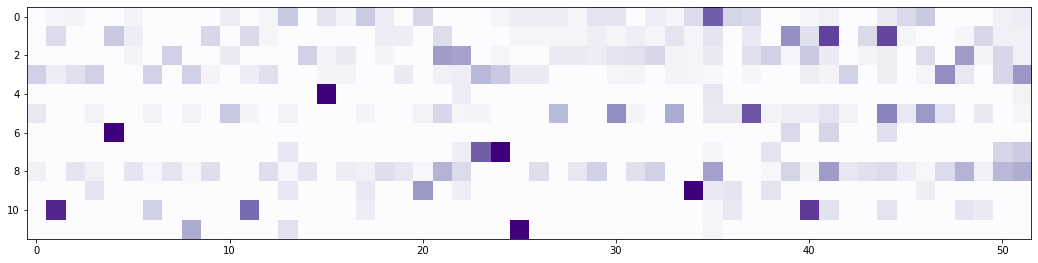

Non-zero values average: 0.463784
---------------------------------------
Number of communities in test400 graph: 154
Link Communities:
[[1, 4, 6, 21, 22, 24, 28, 35, 38, 42, 43, 44, 68, 78, 88, 93, 94, 95, 105, 108, 113, 145], [1, 6, 300, 363, 379, 227], [2, 5, 170, 188, 283], [2, 8, 32, 62, 92, 121, 122, 127, 139, 140, 152, 214, 216, 243, 245, 248, 261, 267, 281, 289, 290, 298, 300, 303, 308, 312, 327], [2, 64, 191, 199, 241, 243, 245, 283, 310, 298], [3, 49, 84, 106, 109, 168, 196, 205, 215, 241, 252, 255, 262, 263, 283, 311, 318, 320, 328, 329, 336, 338, 339, 340, 341, 353, 354, 366], [4, 15, 105, 164, 215, 261, 284, 311, 352, 340, 359, 396, 120, 337], [5, 9, 27, 30, 37, 45, 50, 54, 58, 65, 69, 74, 76, 77, 80, 81, 90, 97, 99, 103, 133, 162], [5, 79, 165, 256, 298], [6, 27, 44, 201, 237, 265, 296, 341, 346, 349, 279, 332, 379, 311, 364], [7, 12, 13, 29, 47, 48, 52, 75, 104, 107, 110, 111, 132, 160, 166, 173, 174, 180, 190, 201, 208, 217, 231, 271, 275], [7, 43, 124, 244, 342], [8, 2

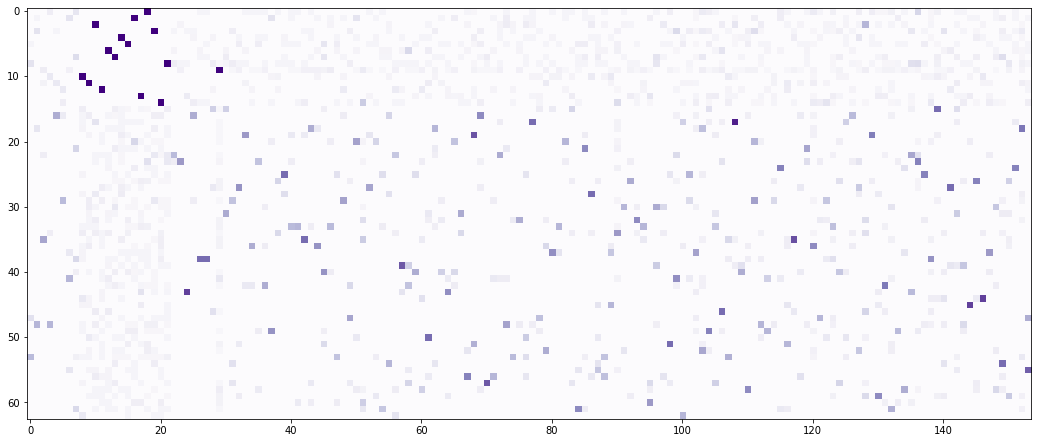

Non-zero values average: 0.362183
---------------------------------------
Number of communities in test1000 graph: 637
Link Communities:
[[1, 7, 56, 126, 184, 232, 303, 427, 435, 454, 482, 525, 689, 701, 930], [1, 34, 61, 146, 151, 235, 282, 421, 738, 754, 756, 842, 865, 902, 909], [1, 117, 130, 151, 491, 496, 621, 657, 699], [1, 126, 146, 151, 280, 282, 536, 604, 733, 761, 763, 782, 849, 865, 919], [2, 19, 78, 217, 263, 523, 590, 696, 757], [2, 24, 263, 757], [2, 34, 97, 132, 215, 435, 486, 503, 745], [2, 78, 209, 436, 523, 526, 590, 777, 864, 893], [2, 124, 167, 446], [2, 131, 352, 448, 607, 643], [2, 251, 266, 387, 401, 526, 590, 594, 676, 757, 759, 811], [3, 14, 244, 377, 455, 535, 654, 679, 712, 713, 746, 785], [3, 34, 594, 595, 620, 643, 735, 746, 776], [3, 87, 90, 113, 190, 357, 573, 682, 714, 718, 795, 830, 856, 894, 947, 954, 988], [3, 112, 152, 222, 300, 338, 530, 624, 661, 713, 790, 827], [3, 179, 224, 272, 607, 662, 723, 727, 800, 802], [3, 338, 661, 790], [4, 7, 13, 49], [

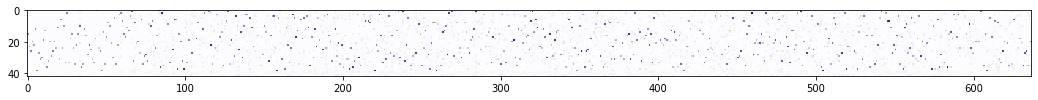

Non-zero values average: 0.318228
---------------------------------------


In [175]:
ratio_A_linkcomm, avg_A_linkcomm = [], []
for i in range(len(gs)):
    com_linkcomm = comms[i]
    print("Number of communities in %s graph: %s" % (gnames[i], len(com_linkcomm)))
    print("Link Communities:")
    print(sorted(com_linkcomm))
    r_A_linkcomm = seq_match(com_A[i], com_linkcomm)
    print(r_A_linkcomm)
    ratio_A_linkcomm.append(r_A_linkcomm)
    plt.figure(figsize=(18,18))
    plt.imshow(r_A_linkcomm, cmap=plt.cm.Purples, interpolation='nearest')
    plt.show()
    a_A_linkcomm = nonzeroavg(r_A_linkcomm)
    print("Non-zero values average: %f" % a_A_linkcomm)
    avg_A_linkcomm.append(a_A_linkcomm)
    print(sprtr)

In [171]:
limiters = [0.4, 0.6, 0.6, 0.5]
for i in range(len(gs)):
    print("graph: %s" % gnames[i])
    getHighestRatios(ratio_A_linkcomm[i], 25, com_A[i], comms[i], limiters[i])

graph: test75
Sequental matching ratio: 0.800000
Index: 9 - 42
[7, 13, 20, 22, 25, 32, 33, 50, 71, 72]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.750000
Index: 6 - 4
[37, 44, 46]
[11, 27, 37, 44, 46]
----------------------
Sequental matching ratio: 0.727273
Index: 7 - 44
[28, 31, 36, 40]
[24, 28, 31, 36, 40, 45, 49]
----------------------
Sequental matching ratio: 0.714286
Index: 5 - 32
[2, 39, 41, 53, 65, 66]
[2, 5, 19, 39, 53, 56, 65, 66]
----------------------
Sequental matching ratio: 0.666667
Index: 3 - 22
[26, 30, 48, 58, 69, 73, 74]
[9, 10, 14, 23, 26, 29, 30, 38, 48, 58, 61, 69, 73, 74]
----------------------
Sequental matching ratio: 0.666667
Index: 4 - 30
[42, 59, 67, 68]
[6, 18, 34, 41, 42, 59, 67, 68]
----------------------
Sequental matching ratio: 0.666667
Index: 9 - 11
[7, 22, 32, 33, 71]
[4, 7, 12, 22, 25, 32, 33, 50, 71, 72]
----------------------
Sequental matching ratio: 0.666667
Index: 10 - 20
[10, 35, 54, 55]
[1, 21, 3